# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor
import numpy as np

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7f3afdd258d0>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../../input_files/ap2.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

['default_assoc', 1.0]
['A']
['M']
['B']
['S']
Parsing rule...
['A(a)+B(b)<->A(a!1).B(a!1)', '', 'G=-20']
['A', 'B', '']
['A(a)+B(b)', 'A(a!1).B(a!1)']
GGGGGGGGGgg
Parsing rule...
['A(b)+M(a)<->A(b!1).M(a!1)', '', 'G=-20']
['A', 'M', '']
['A(b)+M(a)', 'A(b!1).M(a!1)']
GGGGGGGGGgg
Parsing rule...
['A(c)+S(a)<->A(c!1).S(a!1)', '', 'G=-20']
['A', 'S', '']
['A(c)+S(a)', 'A(c!1).S(a!1)']
GGGGGGGGGgg
Parsing rule...
['B(b)+M(b)<->B(b!1).M(b!1)', '', 'G=-20']
['B', 'M', '']
['B(b)+M(b)', 'B(b!1).M(b!1)']
GGGGGGGGGgg
Parsing rule...
['M(c)+S(b)<->M(c!1).S(b!1)', '', 'G=-20']
['M', 'S', '']
['M(c)+S(b)', 'M(c!1).S(b!1)']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f3a66e12ac8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f3a66e12ac8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'A'}
{'A'}
set()
Steric hindrance detected
Node-1 :  (0, {'struct': <ne

Orig edges:  []
Nextn edges:  []
Item edges:  []
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
Allowed edges: 
('A', 'S')
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
Node-1 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f3afc43da58>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f3afc43da58>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'S'}
{'S'}
set()
Steric hindrance detected
Node-1 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f3afc43da58>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x7f3afc43dbe0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S'}
{'A', 'M'}
{'S'}
False
Orig edges:  []
Nextn edges:  [('A', 'M')]
Item edges:  [('A', 'M')]
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
Allowed edges: 
('A', 'S')
###

Node-1 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7f3a66d78dd8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7f3a66d78dd8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A'}
{'S', 'A'}
set()
Steric hindrance detected
Node-1 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7f3a66d78dd8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (7, {'struct': <networkx.classes.graph.Graph object at 0x7f3a66d1d358>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A'}
{'B', 'M'}
{'S', 'A'}
False
Orig edges:  [('A', 'S')]
Nextn edges:  [('M', 'B')]
Item edges:  [('A', 'S'), ('M', 'B')]
Allowed edges: 
('A', 'B')
############################3
Allowed edges: 
('A', 'M')
############################3
Allowed edges: 
('A', 'S')
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
############################3
[(13, {

Node-1 :  (10, {'struct': <networkx.classes.graph.Graph object at 0x7f3a673e1390>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f3afc43da58>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'S', 'A', 'M'}
{'S'}
{'A', 'M'}
Steric hindrance detected
Node-1 :  (10, {'struct': <networkx.classes.graph.Graph object at 0x7f3a673e1390>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x7f3afc43dbe0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A', 'M'}
{'A', 'M'}
{'S'}
Steric hindrance detected
Node-1 :  (10, {'struct': <networkx.classes.graph.Graph object at 0x7f3a673e1390>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x7f3a66de9668>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{

In [4]:
uid_dict = {}
sys.path.append("../../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)

{(0, 4): 0, (0, 5): 1, (0, 6): 2, (0, 9): 17, (0, 10): 18, (0, 13): 20, (1, 4): 0, (1, 7): 3, (1, 8): 4, (1, 9): 5, (1, 10): 6, (1, 13): 19, (2, 5): 1, (2, 7): 3, (2, 9): 7, (2, 11): 8, (2, 12): 9, (2, 13): 10, (3, 6): 2, (3, 8): 4, (3, 10): 11, (3, 11): 12, (3, 12): 13, (3, 13): 14, (4, 9): 7, (4, 10): 11, (5, 9): 5, (5, 11): 12, (5, 13): 15, (6, 10): 6, (6, 11): 8, (6, 13): 16, (7, 12): 13, (7, 13): 16, (7, 9): 17, (8, 12): 9, (8, 13): 15, (8, 10): 18, (9, 13): 14, (10, 13): 10, (11, 13): 19, (12, 13): 20}


In [5]:
#Do modifications here
#Changing Initial Conditions
import networkx as nx
#Changin k_on
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
new_kon = new_kon + Tensor([1.]*np.array(1e0))
update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')

# for edge in rn.network.edges:
#     print(rn.network.get_edge_data(edge[0],edge[1]))
vec_rn = VectorizedRxnNet(rn, dev='cpu')
print(vec_rn.kon)

#Changing initial concentrations

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 17}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 18}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 20}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 4}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 5}
{'k_on'

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [6]:
vec_rn.update_reaction_net(rn)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve()
print(solution)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

No aceeptable solution found
None
No Equilibrium solution
Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.], dtype=torch.float64, requires_grad=True)


In [6]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
from torch import DoubleTensor as Tensor

def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        
        kon_sum = 0
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
total_con_rate = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)
#print(total_con_rate)

[['A', 'AM', 'ABM', 'ABMS'], ['M', 'AM', 'ABM', 'ABMS'], ['B', 'AB', 'ABM', 'ABMS'], ['S', 'AS', 'AMS', 'ABMS'], ['AM', 'ABM', 'ABMS'], ['AB', 'ABM', 'ABMS'], ['AS', 'AMS', 'ABMS'], ['BM', 'BMS', 'ABMS'], ['MS', 'BMS', 'ABMS'], ['ABM', 'ABMS'], ['AMS', 'ABMS'], ['ABS', 'ABMS'], ['BMS', 'ABMS'], ['ABMS']]
[3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0]


In [7]:
if solution != None:
    for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
        print(k," : ", v.item())

NameError: name 'solution' is not defined

In [9]:
# if solution !=None:
#     for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#         print(k," : ", v)

## Using the optimizer with a 1 second simulation runtime ##

In [10]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=5000,
                  learning_rate=new_kon[0].item()/1e2,
                  device='cpu',method="RMSprop")
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
Reaction Parameters before optimization: 
[Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.], dtype=torch.float64, requires_grad=True)]
Using CPU
yield on sim iteration 0 was 51.7%
current params: tensor([0.9000, 1.1000, 1.1000, 1.1000, 1.1000, 0.9000, 0.9000, 1.1000, 0.9000,
        0.9000, 1.1000, 1.1000, 0.9000, 0.9000, 1.1000, 1.1000, 1.1000, 0.9000,
        0.9000, 1.1000, 1.1000], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 56.2%
current params: tensor([0.9298, 1.1893, 1.1902, 1.1918, 1.1926, 0.8407, 0.8401, 1.0790, 0.8803,
        0.8535, 1.1590, 1.0801, 0.8904, 0.8622, 1.1550, 1.1016, 1.1016, 0.8161,
        0.8158, 1.1754, 1.1527], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 57.4%
current params: tensor([0.8573, 1.2532, 1.2536, 1.2496, 1.2496, 0.7634, 0.7627, 1.1177, 0.8057,
        0.7890, 1.2073, 1.1276, 0.8158, 0.7964, 1.2066, 1.1619, 1.1620, 0.7487,
        0.7

yield on sim iteration 29 was 61.2%
current params: tensor([0.9825, 1.9596, 1.9659, 1.9633, 1.9671, 0.5582, 0.5578, 0.9650, 0.9450,
        0.9143, 1.3797, 0.9771, 0.9560, 0.9223, 1.3736, 1.0451, 1.0452, 0.6133,
        0.6139, 1.4453, 1.4443], dtype=torch.float64)
Using CPU
yield on sim iteration 30 was 61.4%
current params: tensor([0.9799, 1.9787, 1.9851, 1.9817, 1.9856, 0.5422, 0.5418, 0.9649, 0.9452,
        0.9147, 1.3879, 0.9771, 0.9563, 0.9228, 1.3816, 1.0482, 1.0482, 0.6001,
        0.6007, 1.4510, 1.4515], dtype=torch.float64)
Using CPU
yield on sim iteration 31 was 61.6%
current params: tensor([0.9773, 1.9976, 2.0041, 1.9999, 2.0039, 0.5259, 0.5255, 0.9648, 0.9456,
        0.9152, 1.3958, 0.9771, 0.9568, 0.9233, 1.3895, 1.0512, 1.0512, 0.5867,
        0.5873, 1.4566, 1.4587], dtype=torch.float64)
Using CPU
yield on sim iteration 32 was 61.9%
current params: tensor([0.9746, 2.0163, 2.0229, 2.0180, 2.0220, 0.5094, 0.5089, 0.9647, 0.9461,
        0.9158, 1.4036, 0.9771, 0.9574, 

yield on sim iteration 59 was 72.1%
current params: tensor([0.8895, 2.4656, 2.4730, 2.4636, 2.4682, 0.0874, 0.0874, 0.9368, 1.0181,
        0.9765, 1.5477, 0.9527, 1.0318, 0.9867, 1.5394, 1.0287, 1.0288, 0.1432,
        0.1434, 1.6788, 1.6749], dtype=torch.float64)
Using CPU
yield on sim iteration 60 was 72.9%
current params: tensor([0.8782, 2.4814, 2.4887, 2.4783, 2.4829, 0.1874, 0.1874, 0.9385, 1.0215,
        0.9800, 1.5510, 0.9545, 1.0354, 0.9903, 1.5426, 1.0303, 1.0303, 0.1184,
        0.1186, 1.6825, 1.6797], dtype=torch.float64)
Using CPU
yield on sim iteration 61 was 71.9%
current params: tensor([0.8855, 2.4961, 2.5035, 2.4877, 2.4923, 0.1871, 0.1870, 0.9315, 1.0217,
        0.9934, 1.5524, 0.9476, 1.0356, 1.0038, 1.5440, 1.0241, 1.0242, 0.1204,
        0.1206, 1.6814, 1.7006], dtype=torch.float64)
Using CPU
yield on sim iteration 62 was 72.4%
current params: tensor([0.8608, 2.5130, 2.5203, 2.5069, 2.5115, 0.1862, 0.1862, 0.9406, 1.0193,
        0.9954, 1.5580, 0.9567, 1.0333, 

yield on sim iteration 89 was 75.6%
current params: tensor([0.6817, 2.8739, 2.8815, 2.8717, 2.8764, 0.1705, 0.1706, 0.9553, 1.1215,
        1.1086, 1.6461, 0.9732, 1.1382, 1.1210, 1.6361, 1.0440, 1.0441, 0.1699,
        0.1701, 1.8197, 1.8809], dtype=torch.float64)
Using CPU
yield on sim iteration 90 was 75.8%
current params: tensor([0.6726, 2.8864, 2.8940, 2.8844, 2.8892, 0.1697, 0.1698, 0.9567, 1.1257,
        1.1127, 1.6493, 0.9747, 1.1425, 1.1252, 1.6392, 1.0464, 1.0465, 0.1691,
        0.1693, 1.8241, 1.8859], dtype=torch.float64)
Using CPU
yield on sim iteration 91 was 75.9%
current params: tensor([0.6632, 2.8991, 2.9067, 2.8970, 2.9018, 0.1689, 0.1690, 0.9583, 1.1298,
        1.1168, 1.6525, 0.9764, 1.1467, 1.1294, 1.6424, 1.0489, 1.0490, 0.1684,
        0.1686, 1.8288, 1.8906], dtype=torch.float64)
Using CPU
yield on sim iteration 92 was 76.0%
current params: tensor([0.6525, 2.9118, 2.9195, 2.9097, 2.9145, 0.1681, 0.1682, 0.9604, 1.1338,
        1.1206, 1.6558, 0.9784, 1.1509, 

yield on sim iteration 119 was 82.7%
current params: tensor([0.3696, 3.2828, 3.2906, 3.2325, 3.2376, 0.1179, 0.1181, 1.0596, 1.1868,
        1.2898, 1.7643, 1.0782, 1.2064, 1.3046, 1.7524, 1.1725, 1.1726, 0.1271,
        0.1275, 1.8912, 2.0917], dtype=torch.float64)
Using CPU
yield on sim iteration 120 was 83.1%
current params: tensor([0.4089, 3.2675, 3.2752, 3.2354, 3.2404, 0.1303, 0.1305, 1.0342, 1.2132,
        1.2960, 1.7506, 1.0529, 1.2328, 1.3107, 1.7389, 1.1447, 1.1448, 0.1350,
        0.1353, 1.9083, 2.0859], dtype=torch.float64)
Using CPU
yield on sim iteration 121 was 81.2%
current params: tensor([0.4035, 3.2747, 3.2824, 3.2502, 3.2551, 0.1284, 0.1286, 1.0371, 1.2170,
        1.2959, 1.7539, 1.0558, 1.2367, 1.3107, 1.7421, 1.1483, 1.1484, 0.1329,
        0.1332, 1.9119, 2.0874], dtype=torch.float64)
Using CPU
yield on sim iteration 122 was 81.8%
current params: tensor([0.4017, 3.2813, 3.2890, 3.2618, 3.2668, 0.1273, 0.1275, 1.0376, 1.2205,
        1.2999, 1.7557, 1.0563, 1.24

yield on sim iteration 149 was 84.1%
current params: tensor([0.3674, 3.4503, 3.4579, 3.5686, 3.5733, 0.1034, 0.1036, 1.0373, 1.3392,
        1.4082, 1.7933, 1.0564, 1.3605, 1.4246, 1.7810, 1.1509, 1.1510, 0.1008,
        0.1012, 2.0184, 2.1713], dtype=torch.float64)
Using CPU
yield on sim iteration 150 was 84.1%
current params: tensor([0.3654, 3.4573, 3.4648, 3.5793, 3.5840, 0.1021, 0.1023, 1.0377, 1.3430,
        1.4136, 1.7947, 1.0567, 1.3644, 1.4301, 1.7824, 1.1516, 1.1516, 0.0993,
        0.0997, 2.0212, 2.1749], dtype=torch.float64)
Using CPU
yield on sim iteration 151 was 84.2%
current params: tensor([0.3632, 3.4644, 3.4719, 3.5899, 3.5947, 0.1008, 0.1010, 1.0381, 1.3467,
        1.4192, 1.7962, 1.0572, 1.3681, 1.4357, 1.7838, 1.1523, 1.1524, 0.1826,
        0.1830, 2.0238, 2.1785], dtype=torch.float64)
Using CPU
yield on sim iteration 152 was 82.3%
current params: tensor([0.3578, 3.4740, 3.4816, 3.6002, 3.6049, 0.0983, 0.0985, 1.0405, 1.3485,
        1.4250, 1.7993, 1.0595, 1.36

yield on sim iteration 179 was 82.7%
current params: tensor([0.3016, 3.6670, 3.6745, 3.8878, 3.8924, 0.1639, 0.1641, 1.0502, 1.4654,
        1.5544, 1.8547, 1.0695, 1.4885, 1.5727, 1.8416, 1.1885, 1.1885, 0.1586,
        0.1591, 2.1462, 2.2629], dtype=torch.float64)
Using CPU
yield on sim iteration 180 was 82.8%
current params: tensor([0.3000, 3.6745, 3.6820, 3.8973, 3.9019, 0.1632, 0.1635, 1.0502, 1.4694,
        1.5612, 1.8563, 1.0695, 1.4925, 1.5795, 1.8432, 1.1897, 1.1898, 0.1579,
        0.1583, 2.1488, 2.2668], dtype=torch.float64)
Using CPU
yield on sim iteration 181 was 82.9%
current params: tensor([0.2505, 3.6768, 3.6843, 3.9418, 3.9464, 0.1559, 0.1561, 1.0737, 1.4914,
        1.5119, 1.8770, 1.0930, 1.5147, 1.5305, 1.8636, 1.2304, 1.2305, 0.1451,
        0.1456, 2.1790, 2.2259], dtype=torch.float64)
Using CPU
yield on sim iteration 182 was 84.1%
current params: tensor([0.2895, 3.6864, 3.6939, 3.9253, 3.9299, 0.1615, 0.1617, 1.0569, 1.4862,
        1.5514, 1.8634, 1.0763, 1.50

yield on sim iteration 209 was 85.4%
current params: tensor([0.2491, 3.9036, 3.9110, 4.1495, 4.1542, 0.1391, 0.1393, 1.0596, 1.5874,
        1.7201, 1.9047, 1.0791, 1.6123, 1.7400, 1.8910, 1.2174, 1.2174, 0.1329,
        0.1333, 2.2497, 2.3726], dtype=torch.float64)
Using CPU
yield on sim iteration 210 was 85.4%
current params: tensor([0.2475, 3.9111, 3.9184, 4.1585, 4.1632, 0.1382, 0.1385, 1.0597, 1.5924,
        1.7255, 1.9061, 1.0791, 1.6173, 1.7455, 1.8924, 1.2182, 1.2182, 0.1318,
        0.1323, 2.2530, 2.3764], dtype=torch.float64)
Using CPU
yield on sim iteration 211 was 85.5%
current params: tensor([0.2457, 3.9186, 3.9260, 4.1675, 4.1721, 0.1374, 0.1376, 1.0598, 1.5972,
        1.7311, 1.9076, 1.0793, 1.6222, 1.7510, 1.8938, 1.2191, 1.2191, 0.1308,
        0.1313, 2.2561, 2.3802], dtype=torch.float64)
Using CPU
yield on sim iteration 212 was 85.5%
current params: tensor([0.2437, 3.9263, 3.9337, 4.1764, 4.1810, 0.1364, 0.1366, 1.0600, 1.6020,
        1.7367, 1.9090, 1.0795, 1.62

yield on sim iteration 239 was 87.4%
current params: tensor([0.1507, 4.1254, 4.1323, 4.4403, 4.4451, 0.1781, 0.1784, 1.0744, 1.7655,
        1.8589, 1.9537, 1.0940, 1.7920, 1.8805, 1.9400, 1.2707, 1.2711, 0.1709,
        0.1695, 2.3629, 2.4582], dtype=torch.float64)
Using CPU
yield on sim iteration 240 was 85.4%
current params: tensor([0.1475, 4.1341, 4.1411, 4.4486, 4.4535, 0.1773, 0.1776, 1.0748, 1.7697,
        1.8660, 1.9558, 1.0944, 1.7962, 1.8877, 1.9421, 1.2729, 1.2732, 0.1700,
        0.1686, 2.3662, 2.4636], dtype=torch.float64)
Using CPU
yield on sim iteration 241 was 85.5%
current params: tensor([0.1436, 4.1432, 4.1501, 4.4570, 4.4619, 0.1763, 0.1767, 1.0753, 1.7735,
        1.8734, 1.9582, 1.0949, 1.8001, 1.8951, 1.9444, 1.2755, 1.2759, 0.1689,
        0.1676, 2.3692, 2.4694], dtype=torch.float64)
Using CPU
yield on sim iteration 242 was 85.6%
current params: tensor([0.1380, 4.1530, 4.1599, 4.4651, 4.4700, 0.1751, 0.1755, 1.0762, 1.7763,
        1.8816, 1.9611, 1.0958, 1.80

yield on sim iteration 269 was 84.5%
current params: tensor([0.2256, 4.3449, 4.3516, 4.6943, 4.6991, 0.1746, 0.1750, 1.0486, 1.9478,
        2.0468, 1.9741, 1.0684, 1.9760, 2.0698, 1.9603, 1.2481, 1.2487, 0.1624,
        0.1611, 2.5074, 2.5715], dtype=torch.float64)
Using CPU
yield on sim iteration 270 was 84.5%
current params: tensor([0.2252, 4.3541, 4.3608, 4.7013, 4.7061, 0.1739, 0.1743, 1.0484, 1.9503,
        2.0559, 1.9755, 1.0682, 1.9785, 2.0789, 1.9617, 1.2483, 1.2489, 0.1619,
        0.1606, 2.5098, 2.5781], dtype=torch.float64)
Using CPU
yield on sim iteration 271 was 84.5%
current params: tensor([0.2214, 4.3659, 4.3726, 4.7095, 4.7143, 0.1716, 0.1720, 1.0517, 1.9502,
        2.0657, 1.9803, 1.0715, 1.9785, 2.0887, 1.9665, 1.2556, 1.2561, 0.1597,
        0.1585, 2.5095, 2.5864], dtype=torch.float64)
Using CPU
yield on sim iteration 272 was 85.1%
current params: tensor([0.2211, 4.3742, 4.3809, 4.7173, 4.7221, 0.1710, 0.1713, 1.0515, 1.9539,
        2.0733, 1.9816, 1.0714, 1.98

yield on sim iteration 299 was 87.6%
current params: tensor([0.1794, 4.6158, 4.6223, 4.9442, 4.9492, 0.1376, 0.1380, 1.0725, 2.0493,
        2.2813, 2.0400, 1.0925, 2.0790, 2.3054, 2.0259, 1.3185, 1.3191, 0.1256,
        0.1249, 2.5827, 2.7338], dtype=torch.float64)
Using CPU
yield on sim iteration 300 was 87.7%
current params: tensor([0.1784, 4.6235, 4.6300, 4.9532, 4.9583, 0.1367, 0.1370, 1.0728, 2.0545,
        2.2878, 2.0415, 1.0927, 2.0843, 2.3120, 2.0273, 1.3197, 1.3204, 0.1245,
        0.1238, 2.5860, 2.7377], dtype=torch.float64)
Using CPU
yield on sim iteration 301 was 87.7%
current params: tensor([0.1773, 4.6312, 4.6377, 4.9623, 4.9674, 0.1357, 0.1361, 1.0731, 2.0598,
        2.2942, 2.0430, 1.0930, 2.0896, 2.3184, 2.0288, 1.3210, 1.3217, 0.1233,
        0.1227, 2.5893, 2.7415], dtype=torch.float64)
Using CPU
yield on sim iteration 302 was 87.8%
current params: tensor([0.1761, 4.6389, 4.6454, 4.9716, 4.9766, 0.1346, 0.1350, 1.0734, 2.0652,
        2.3005, 2.0445, 1.0933, 2.09

yield on sim iteration 329 was 87.8%
current params: tensor([0.1644, 4.8291, 4.8354, 5.2298, 5.2348, 0.1175, 0.1179, 1.0703, 2.2429,
        2.4572, 2.0724, 1.0903, 2.2741, 2.4825, 2.0581, 1.3306, 1.3313, 0.1739,
        0.1732, 2.7025, 2.8346], dtype=torch.float64)
Using CPU
yield on sim iteration 330 was 87.5%
current params: tensor([0.1631, 4.8378, 4.8441, 5.2384, 5.2433, 0.1162, 0.1166, 1.0707, 2.2482,
        2.4647, 2.0742, 1.0907, 2.2794, 2.4900, 2.0599, 1.3323, 1.3331, 0.1731,
        0.1723, 2.7050, 2.8405], dtype=torch.float64)
Using CPU
yield on sim iteration 331 was 87.6%
current params: tensor([0.1617, 4.8466, 4.8530, 5.2469, 5.2519, 0.1149, 0.1153, 1.0711, 2.2534,
        2.4722, 2.0761, 1.0911, 2.2847, 2.4976, 2.0618, 1.3343, 1.3350, 0.1722,
        0.1715, 2.7074, 2.8466], dtype=torch.float64)
Using CPU
yield on sim iteration 332 was 87.6%
current params: tensor([0.1607, 4.8553, 4.8616, 5.2554, 5.2604, 0.1138, 0.1142, 1.0712, 2.2588,
        2.4798, 2.0776, 1.0913, 2.29

yield on sim iteration 359 was 87.6%
current params: tensor([0.1848, 5.0263, 5.0325, 5.5236, 5.5285, 0.1157, 0.1161, 1.0475, 2.4782,
        2.6180, 2.0898, 1.0676, 2.5106, 2.6445, 2.0754, 1.2958, 1.2966, 0.1625,
        0.1618, 2.8553, 2.9434], dtype=torch.float64)
Using CPU
yield on sim iteration 360 was 87.6%
current params: tensor([0.1838, 5.0350, 5.0412, 5.5322, 5.5371, 0.1146, 0.1150, 1.0476, 2.4838,
        2.6258, 2.0913, 1.0678, 2.5162, 2.6523, 2.0770, 1.2969, 1.2978, 0.1616,
        0.1610, 2.8587, 2.9489], dtype=torch.float64)
Using CPU
yield on sim iteration 361 was 87.7%
current params: tensor([0.1827, 5.0438, 5.0499, 5.5407, 5.5456, 0.1134, 0.1138, 1.0478, 2.4892,
        2.6337, 2.0929, 1.0680, 2.5218, 2.6602, 2.0786, 1.2982, 1.2990, 0.1607,
        0.1601, 2.8620, 2.9544], dtype=torch.float64)
Using CPU
yield on sim iteration 362 was 87.7%
current params: tensor([0.1815, 5.0527, 5.0588, 5.5492, 5.5541, 0.1122, 0.1126, 1.0481, 2.4947,
        2.6417, 2.0946, 1.0682, 2.52

yield on sim iteration 389 was 88.0%
current params: tensor([0.1448, 5.3050, 5.3110, 5.7717, 5.7768, 0.1660, 0.1664, 1.0578, 2.6240,
        2.8855, 2.1441, 1.0781, 2.6578, 2.9128, 2.1295, 1.3464, 1.3473, 0.1341,
        0.1336, 2.9540, 3.1187], dtype=torch.float64)
Using CPU
yield on sim iteration 390 was 88.1%
current params: tensor([0.1424, 5.3140, 5.3200, 5.7807, 5.7857, 0.1648, 0.1653, 1.0586, 2.6292,
        2.8941, 2.1464, 1.0788, 2.6631, 2.9214, 2.1318, 1.3491, 1.3501, 0.1327,
        0.1322, 2.9577, 3.1248], dtype=torch.float64)
Using CPU
yield on sim iteration 391 was 88.2%
current params: tensor([0.1392, 5.3237, 5.3297, 5.7894, 5.7945, 0.1634, 0.1638, 1.0596, 2.6337,
        2.9034, 2.1492, 1.0799, 2.6676, 2.9307, 2.1346, 1.3529, 1.3538, 0.1311,
        0.1306, 2.9610, 3.1315], dtype=torch.float64)
Using CPU
yield on sim iteration 392 was 88.1%
current params: tensor([0.1692, 5.3472, 5.3532, 5.7703, 5.7753, 0.1694, 0.1698, 1.0454, 2.6153,
        2.9424, 2.1333, 1.0657, 2.64

yield on sim iteration 419 was 88.9%
current params: tensor([0.1527, 5.5622, 5.5681, 6.0195, 6.0246, 0.1529, 0.1533, 1.0433, 2.8004,
        3.1293, 2.1716, 1.0636, 2.8355, 3.1574, 2.1569, 1.3249, 1.3259, 0.1213,
        0.1208, 3.0808, 3.2846], dtype=torch.float64)
Using CPU
yield on sim iteration 420 was 88.5%
current params: tensor([0.1757, 5.5846, 5.5906, 6.0053, 6.0104, 0.1573, 0.1577, 1.0314, 2.7846,
        3.1624, 2.1608, 1.0518, 2.8198, 3.1904, 2.1462, 1.2949, 1.2959, 0.1331,
        0.1326, 3.0703, 3.3117], dtype=torch.float64)
Using CPU
yield on sim iteration 421 was 88.0%
current params: tensor([0.1741, 5.5929, 5.5988, 6.0146, 6.0197, 0.1562, 0.1567, 1.0319, 2.7911,
        3.1693, 2.1628, 1.0522, 2.8264, 3.1973, 2.1482, 1.2966, 1.2976, 0.1318,
        0.1313, 3.0744, 3.3173], dtype=torch.float64)
Using CPU
yield on sim iteration 422 was 88.0%
current params: tensor([0.1728, 5.6013, 5.6072, 6.0235, 6.0286, 0.1553, 0.1557, 1.0321, 2.7974,
        3.1765, 2.1646, 1.0525, 2.83

yield on sim iteration 449 was 87.4%
current params: tensor([0.2159, 5.7723, 5.7781, 6.2711, 6.2763, 0.1635, 0.1639, 0.9919, 2.9956,
        3.3192, 2.1690, 1.0123, 3.0318, 3.3481, 2.1545, 1.2428, 1.2439, 0.1285,
        0.1280, 3.2284, 3.4149], dtype=torch.float64)
Using CPU
yield on sim iteration 450 was 87.4%
current params: tensor([0.2146, 5.7806, 5.7863, 6.2797, 6.2849, 0.1624, 0.1628, 0.9922, 3.0008,
        3.3264, 2.1709, 1.0127, 3.0371, 3.3553, 2.1563, 1.2445, 1.2456, 0.1272,
        0.1267, 3.2317, 3.4197], dtype=torch.float64)
Using CPU
yield on sim iteration 451 was 87.4%
current params: tensor([0.2182, 5.7947, 5.8005, 6.2800, 6.2852, 0.1621, 0.1625, 0.9889, 2.9978,
        3.3431, 2.1699, 1.0094, 3.0341, 3.3720, 2.1553, 1.2386, 1.2397, 0.1297,
        0.1292, 3.2288, 3.4363], dtype=torch.float64)
Using CPU
yield on sim iteration 452 was 87.4%
current params: tensor([0.2168, 5.8029, 5.8087, 6.2887, 6.2938, 0.1610, 0.1614, 0.9893, 3.0030,
        3.3502, 2.1718, 1.0098, 3.03

yield on sim iteration 479 was 87.0%
current params: tensor([0.2094, 6.0272, 6.0329, 6.5089, 6.5142, 0.1403, 0.1407, 0.9809, 3.1494,
        3.5457, 2.2095, 1.0015, 3.1868, 3.5753, 2.1949, 1.2406, 1.2418, 0.1807,
        0.1803, 3.3434, 3.5844], dtype=torch.float64)
Using CPU
yield on sim iteration 480 was 87.1%
current params: tensor([0.2086, 6.0353, 6.0410, 6.5174, 6.5227, 0.1393, 0.1397, 0.9809, 3.1555,
        3.5524, 2.2113, 1.0015, 3.1929, 3.5820, 2.1966, 1.2419, 1.2431, 0.1801,
        0.1797, 3.3468, 3.5892], dtype=torch.float64)
Using CPU
yield on sim iteration 481 was 87.1%
current params: tensor([0.2079, 6.0435, 6.0491, 6.5258, 6.5312, 0.1383, 0.1387, 0.9808, 3.1616,
        3.5591, 2.2131, 1.0014, 3.1991, 3.5888, 2.1984, 1.2431, 1.2443, 0.1795,
        0.1791, 3.3502, 3.5941], dtype=torch.float64)
Using CPU
yield on sim iteration 482 was 87.8%
current params: tensor([0.2127, 6.0456, 6.0512, 6.5381, 6.5434, 0.1407, 0.1411, 0.9766, 3.1745,
        3.5596, 2.2114, 0.9972, 3.21

yield on sim iteration 509 was 87.4%
current params: tensor([0.2261, 6.2383, 6.2438, 6.7859, 6.7913, 0.1336, 0.1340, 0.9499, 3.3732,
        3.7185, 2.2387, 0.9706, 3.4116, 3.7490, 2.2239, 1.2131, 1.2144, 0.1688,
        0.1683, 3.4973, 3.7228], dtype=torch.float64)
Using CPU
yield on sim iteration 510 was 87.4%
current params: tensor([0.2251, 6.2468, 6.2523, 6.7945, 6.7999, 0.1325, 0.1329, 0.9499, 3.3796,
        3.7258, 2.2405, 0.9707, 3.4180, 3.7563, 2.2258, 1.2144, 1.2157, 0.1680,
        0.1676, 3.5010, 3.7278], dtype=torch.float64)
Using CPU
yield on sim iteration 511 was 87.5%
current params: tensor([0.2242, 6.2554, 6.2608, 6.8031, 6.8086, 0.1313, 0.1317, 0.9500, 3.3859,
        3.7331, 2.2424, 0.9708, 3.4244, 3.7636, 2.2277, 1.2158, 1.2171, 0.1673,
        0.1669, 3.5047, 3.7329], dtype=torch.float64)
Using CPU
yield on sim iteration 512 was 87.5%
current params: tensor([0.2232, 6.2639, 6.2694, 6.8118, 6.8172, 0.1301, 0.1306, 0.9501, 3.3923,
        3.7403, 2.2443, 0.9709, 3.43

yield on sim iteration 539 was 87.7%
current params: tensor([0.2466, 6.4654, 6.4707, 7.0608, 7.0663, 0.1253, 0.1257, 0.9124, 3.6001,
        3.9150, 2.2668, 0.9333, 3.6394, 3.9463, 2.2521, 1.1880, 1.1894, 0.1562,
        0.1558, 3.6499, 3.8537], dtype=torch.float64)
Using CPU
yield on sim iteration 540 was 87.7%
current params: tensor([0.2454, 6.4743, 6.4797, 7.0696, 7.0751, 0.1240, 0.1244, 0.9126, 3.6067,
        3.9229, 2.2688, 0.9335, 3.6461, 3.9542, 2.2540, 1.1895, 1.1908, 0.1553,
        0.1549, 3.6538, 3.8589], dtype=torch.float64)
Using CPU
yield on sim iteration 541 was 88.5%
current params: tensor([0.2440, 6.4833, 6.4887, 7.0784, 7.0839, 0.1225, 0.1230, 0.9129, 3.6133,
        3.9307, 2.2711, 0.9338, 3.6527, 3.9620, 2.2563, 1.1911, 1.1925, 0.1544,
        0.1540, 3.6580, 3.8646], dtype=torch.float64)
Using CPU
yield on sim iteration 542 was 88.6%
current params: tensor([0.2425, 6.4923, 6.4977, 7.0873, 7.0928, 0.1210, 0.1215, 0.9133, 3.6199,
        3.9385, 2.2734, 0.9342, 3.65

yield on sim iteration 569 was 89.4%
current params: tensor([0.2342, 6.7118, 6.7170, 7.3406, 7.3461, 0.0991, 0.0995, 0.8994, 3.8250,
        4.1289, 2.3148, 0.9204, 3.8652, 4.1609, 2.3000, 1.1811, 1.1825, 0.1318,
        0.1314, 3.8187, 4.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 570 was 89.4%
current params: tensor([0.2326, 6.7222, 6.7274, 7.3485, 7.3541, 0.1885, 0.1890, 0.8998, 3.8306,
        4.1386, 2.3167, 0.9208, 3.8708, 4.1706, 2.3019, 1.1807, 1.1822, 0.1309,
        0.1305, 3.8236, 4.0184], dtype=torch.float64)
Using CPU
yield on sim iteration 571 was 87.5%
current params: tensor([0.2316, 6.7311, 6.7363, 7.3575, 7.3631, 0.1879, 0.1884, 0.8998, 3.8375,
        4.1469, 2.3189, 0.9208, 3.8777, 4.1790, 2.3041, 1.1821, 1.1835, 0.1299,
        0.1295, 3.8285, 4.0235], dtype=torch.float64)
Using CPU
yield on sim iteration 572 was 87.5%
current params: tensor([0.2305, 6.7400, 6.7452, 7.3666, 7.3722, 0.1873, 0.1878, 0.8999, 3.8443,
        4.1553, 2.3210, 0.9209, 3.88

yield on sim iteration 599 was 87.2%
current params: tensor([0.2700, 7.0153, 7.0205, 7.5521, 7.5579, 0.1791, 0.1796, 0.8504, 3.9767,
        4.4301, 2.3452, 0.8716, 4.0179, 4.4625, 2.3305, 1.1354, 1.1370, 0.1358,
        0.1354, 3.9289, 4.2325], dtype=torch.float64)
Using CPU
yield on sim iteration 600 was 87.3%
current params: tensor([0.2691, 7.0237, 7.0289, 7.5609, 7.5666, 0.1785, 0.1789, 0.8504, 3.9838,
        4.4372, 2.3473, 0.8715, 4.0251, 4.4696, 2.3326, 1.1368, 1.1384, 0.1348,
        0.1344, 3.9334, 4.2368], dtype=torch.float64)
Using CPU
yield on sim iteration 601 was 87.4%
current params: tensor([0.2682, 7.0323, 7.0375, 7.5695, 7.5752, 0.1778, 0.1782, 0.8503, 3.9907,
        4.4446, 2.3494, 0.8715, 4.0320, 4.4770, 2.3347, 1.1378, 1.1394, 0.1338,
        0.1334, 3.9380, 4.2414], dtype=torch.float64)
Using CPU
yield on sim iteration 602 was 87.4%
current params: tensor([0.2673, 7.0408, 7.0460, 7.5781, 7.5839, 0.1771, 0.1775, 0.8503, 3.9976,
        4.4519, 2.3516, 0.8715, 4.03

yield on sim iteration 629 was 88.5%
current params: tensor([0.2358, 7.2716, 7.2766, 7.8195, 7.8256, 0.1557, 0.1563, 0.8544, 4.1960,
        4.6522, 2.4118, 0.8760, 4.2380, 4.6853, 2.3982, 1.1715, 1.1735, 0.1843,
        0.1856, 4.0755, 4.3662], dtype=torch.float64)
Using CPU
yield on sim iteration 630 was 88.2%
current params: tensor([0.2344, 7.2805, 7.2855, 7.8284, 7.8345, 0.1548, 0.1553, 0.8546, 4.2035,
        4.6598, 2.4149, 0.8763, 4.2456, 4.6929, 2.4013, 1.1732, 1.1752, 0.1837,
        0.1849, 4.0802, 4.3726], dtype=torch.float64)
Using CPU
yield on sim iteration 631 was 88.2%
current params: tensor([0.2329, 7.2894, 7.2944, 7.8373, 7.8434, 0.1539, 0.1544, 0.8549, 4.2111,
        4.6675, 2.4180, 0.8765, 4.2532, 4.7006, 2.4044, 1.1749, 1.1769, 0.1830,
        0.1842, 4.0848, 4.3790], dtype=torch.float64)
Using CPU
yield on sim iteration 632 was 88.2%
current params: tensor([0.2314, 7.2984, 7.3034, 7.8463, 7.8523, 0.1529, 0.1535, 0.8552, 4.2187,
        4.6752, 2.4211, 0.8768, 4.26

yield on sim iteration 659 was 87.5%
current params: tensor([0.2600, 7.4973, 7.5022, 8.1106, 8.1166, 0.1530, 0.1536, 0.8130, 4.4692,
        4.8432, 2.4581, 0.8348, 4.5119, 4.8769, 2.4444, 1.1371, 1.1391, 0.1725,
        0.1736, 4.2785, 4.5059], dtype=torch.float64)
Using CPU
yield on sim iteration 660 was 88.3%
current params: tensor([0.2588, 7.5063, 7.5112, 8.1195, 8.1255, 0.1521, 0.1526, 0.8132, 4.4765,
        4.8512, 2.4611, 0.8349, 4.5192, 4.8849, 2.4475, 1.1384, 1.1404, 0.1718,
        0.1728, 4.2833, 4.5121], dtype=torch.float64)
Using CPU
yield on sim iteration 661 was 88.4%
current params: tensor([0.2574, 7.5154, 7.5203, 8.1283, 8.1343, 0.1511, 0.1516, 0.8134, 4.4838,
        4.8592, 2.4642, 0.8351, 4.5265, 4.8930, 2.4505, 1.1398, 1.1418, 0.1710,
        0.1721, 4.2881, 4.5183], dtype=torch.float64)
Using CPU
yield on sim iteration 662 was 88.4%
current params: tensor([0.2560, 7.5245, 7.5294, 8.1371, 8.1431, 0.1501, 0.1506, 0.8136, 4.4911,
        4.8673, 2.4673, 0.8354, 4.53

yield on sim iteration 689 was 88.8%
current params: tensor([0.2631, 7.7440, 7.7488, 8.3889, 8.3949, 0.1403, 0.1408, 0.7861, 4.7146,
        5.0620, 2.5196, 0.8079, 4.7580, 5.0964, 2.5058, 1.1219, 1.1239, 0.1560,
        0.1568, 4.4580, 4.6673], dtype=torch.float64)
Using CPU
yield on sim iteration 690 was 88.9%
current params: tensor([0.2614, 7.7533, 7.7581, 8.3977, 8.4037, 0.1390, 0.1396, 0.7866, 4.7218,
        5.0705, 2.5228, 0.8085, 4.7652, 5.1048, 2.5090, 1.1234, 1.1254, 0.1551,
        0.1559, 4.4624, 4.6737], dtype=torch.float64)
Using CPU
yield on sim iteration 691 was 88.9%
current params: tensor([0.2597, 7.7626, 7.7674, 8.4065, 8.4125, 0.1378, 0.1383, 0.7872, 4.7290,
        5.0789, 2.5259, 0.8090, 4.7725, 5.1133, 2.5121, 1.1249, 1.1269, 0.1542,
        0.1549, 4.4671, 4.6796], dtype=torch.float64)
Using CPU
yield on sim iteration 692 was 89.0%
current params: tensor([0.2578, 7.7719, 7.7767, 8.4154, 8.4214, 0.1365, 0.1370, 0.7878, 4.7363,
        5.0873, 2.5291, 0.8097, 4.77

yield on sim iteration 719 was 91.2%
current params: tensor([0.1981, 8.0173, 8.0221, 8.6633, 8.6693, 0.1871, 0.0987, 0.8086, 4.9486,
        5.3094, 2.6038, 0.8305, 4.9927, 5.3443, 2.5898, 1.1847, 1.1866, 0.1214,
        0.1216, 4.5875, 4.8164], dtype=torch.float64)
Using CPU
yield on sim iteration 720 was 89.9%
current params: tensor([0.1965, 8.0266, 8.0315, 8.6723, 8.6782, 0.1865, 0.1864, 0.8088, 4.9562,
        5.3184, 2.6059, 0.8308, 5.0003, 5.3532, 2.5926, 1.1864, 1.1881, 0.1204,
        0.1206, 4.5918, 4.8215], dtype=torch.float64)
Using CPU
yield on sim iteration 721 was 89.3%
current params: tensor([0.1952, 8.0357, 8.0406, 8.6814, 8.6873, 0.1859, 0.1858, 0.8088, 4.9640,
        5.3271, 2.6084, 0.8308, 5.0082, 5.3620, 2.5952, 1.1880, 1.1897, 0.1194,
        0.1196, 4.5966, 4.8263], dtype=torch.float64)
Using CPU
yield on sim iteration 722 was 89.3%
current params: tensor([0.1939, 8.0449, 8.0498, 8.6905, 8.6964, 0.1854, 0.1853, 0.8088, 4.9719,
        5.3359, 2.6110, 0.8308, 5.01

yield on sim iteration 749 was 90.4%
current params: tensor([0.2221, 8.3226, 8.3275, 8.9016, 8.9077, 0.1743, 0.1743, 0.7732, 5.1479,
        5.6164, 2.6499, 0.7953, 5.1927, 5.6515, 2.6368, 1.1634, 1.1651, 0.1146,
        0.1148, 4.7246, 5.0021], dtype=torch.float64)
Using CPU
yield on sim iteration 750 was 89.4%
current params: tensor([0.2207, 8.3315, 8.3364, 8.9111, 8.9172, 0.1737, 0.1736, 0.7732, 5.1563,
        5.6248, 2.6526, 0.7953, 5.2012, 5.6599, 2.6394, 1.1652, 1.1669, 0.1135,
        0.1137, 4.7296, 5.0070], dtype=torch.float64)
Using CPU
yield on sim iteration 751 was 89.5%
current params: tensor([0.2194, 8.3404, 8.3453, 8.9206, 8.9267, 0.1730, 0.1730, 0.7733, 5.1647,
        5.6332, 2.6552, 0.7953, 5.2096, 5.6683, 2.6420, 1.1669, 1.1686, 0.1124,
        0.1126, 4.7347, 5.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 752 was 89.5%
current params: tensor([0.2180, 8.3494, 8.3542, 8.9302, 8.9362, 0.1724, 0.1723, 0.7733, 5.1731,
        5.6417, 2.6577, 0.7954, 5.21

yield on sim iteration 779 was 89.3%
current params: tensor([0.1837, 8.5828, 8.5875, 9.1986, 9.2047, 0.1565, 0.1565, 0.7732, 5.4227,
        5.8556, 2.7445, 0.7954, 5.4680, 5.8911, 2.7316, 1.1902, 1.1919, 0.1726,
        0.1728, 4.9289, 5.1713], dtype=torch.float64)
Using CPU
yield on sim iteration 780 was 89.3%
current params: tensor([0.1821, 8.5921, 8.5969, 9.2079, 9.2140, 0.1557, 0.1557, 0.7734, 5.4312,
        5.8645, 2.7478, 0.7955, 5.4765, 5.9000, 2.7349, 1.1922, 1.1939, 0.1720,
        0.1722, 4.9338, 5.1780], dtype=torch.float64)
Using CPU
yield on sim iteration 781 was 89.4%
current params: tensor([0.1804, 8.6015, 8.6063, 9.2172, 9.2233, 0.1549, 0.1549, 0.7735, 5.4397,
        5.8735, 2.7511, 0.7957, 5.4850, 5.9090, 2.7382, 1.1942, 1.1959, 0.1713,
        0.1715, 4.9386, 5.1847], dtype=torch.float64)
Using CPU
yield on sim iteration 782 was 89.4%
current params: tensor([0.1788, 8.6109, 8.6157, 9.2265, 9.2326, 0.1541, 0.1541, 0.7737, 5.4482,
        5.8824, 2.7544, 0.7958, 5.49

yield on sim iteration 809 was 91.1%
current params: tensor([0.1322, 8.8576, 8.8623, 9.4869, 9.4930, 0.1328, 0.1329, 0.7758, 5.6927,
        6.1154, 2.8480, 0.7980, 5.7384, 6.1513, 2.8353, 1.2420, 1.2437, 0.1509,
        0.1510, 5.0944, 5.3622], dtype=torch.float64)
Using CPU
yield on sim iteration 810 was 91.1%
current params: tensor([0.1304, 8.8672, 8.8719, 9.4961, 9.5023, 0.1318, 0.1320, 0.7758, 5.7013,
        6.1247, 2.8510, 0.7981, 5.7471, 6.1606, 2.8383, 1.2441, 1.2459, 0.1501,
        0.1503, 5.0989, 5.3682], dtype=torch.float64)
Using CPU
yield on sim iteration 811 was 91.2%
current params: tensor([0.1286, 8.8768, 8.8815, 9.5054, 9.5116, 0.1309, 0.1310, 0.7759, 5.7100,
        6.1340, 2.8540, 0.7981, 5.7558, 6.1699, 2.8413, 1.2463, 1.2480, 0.1494,
        0.1495, 5.1034, 5.3742], dtype=torch.float64)
Using CPU
yield on sim iteration 812 was 91.2%
current params: tensor([0.1268, 8.8865, 8.8911, 9.5147, 9.5208, 0.1299, 0.1301, 0.7759, 5.7187,
        6.1433, 2.8570, 0.7982, 5.76

yield on sim iteration 839 was 91.7%
current params: tensor([0.1805, 9.1397, 9.1443, 9.7746, 9.7808, 0.1022, 0.1024, 0.7827, 5.9647,
        6.3867, 2.9411, 0.8050, 6.0108, 6.4228, 2.9284, 1.2990, 1.3008, 0.1239,
        0.1239, 5.2387, 5.5476], dtype=torch.float64)
Using CPU
yield on sim iteration 840 was 91.8%
current params: tensor([0.1800, 9.1494, 9.1540, 9.7840, 9.7901, 0.1011, 0.1013, 0.7828, 5.9735,
        6.3962, 2.9437, 0.8051, 6.0196, 6.4323, 2.9310, 1.3010, 1.3028, 0.1231,
        0.1230, 5.2428, 5.5532], dtype=torch.float64)
Using CPU
yield on sim iteration 841 was 91.8%
current params: tensor([0.1796, 9.1591, 9.1638, 9.7933, 9.7995, 0.1000, 0.1003, 0.7830, 5.9823,
        6.4056, 2.9463, 0.8053, 6.0284, 6.4418, 2.9336, 1.3030, 1.3048, 0.1222,
        0.1222, 5.2470, 5.5588], dtype=torch.float64)
Using CPU
yield on sim iteration 842 was 91.9%
current params: tensor([0.1791, 9.1689, 9.1735, 9.8027, 9.8088, 0.1850, 0.0992, 0.7831, 5.9911,
        6.4151, 2.9488, 0.8054, 6.03

yield on sim iteration 869 was 91.6%
current params: tensor([ 0.1640,  9.4472,  9.4519, 10.0421, 10.0483,  0.1656,  0.1654,  0.7959,
         6.2048,  6.6945,  3.0456,  0.8183,  6.2514,  6.7306,  3.0342,  1.3735,
         1.3749,  0.1816,  0.1816,  5.3933,  5.7345], dtype=torch.float64)
Using CPU
yield on sim iteration 870 was 90.4%
current params: tensor([ 0.1775,  9.4390,  9.4437, 10.0635, 10.0696,  0.1734,  0.1732,  0.7675,
         6.2333,  6.6845,  3.0186,  0.7898,  6.2798,  6.7207,  3.0072,  1.3220,
         1.3234,  0.1847,  0.1847,  5.4267,  5.7263], dtype=torch.float64)
Using CPU
yield on sim iteration 871 was 90.3%
current params: tensor([ 0.1769,  9.4486,  9.4533, 10.0729, 10.0791,  0.1727,  0.1725,  0.7678,
         6.2421,  6.6936,  3.0237,  0.7901,  6.2886,  6.7299,  3.0123,  1.3242,
         1.3257,  0.1841,  0.1842,  5.4330,  5.7344], dtype=torch.float64)
Using CPU
yield on sim iteration 872 was 90.3%
current params: tensor([ 0.1764,  9.4581,  9.4628, 10.0824, 10.0886, 

yield on sim iteration 897 was 91.0%
current params: tensor([ 0.1583,  9.6920,  9.6966, 10.3264, 10.3326,  0.1544,  0.1543,  0.7830,
         6.4831,  6.9268,  3.1505,  0.8054,  6.5299,  6.9632,  3.1395,  1.3947,
         1.3961,  0.1664,  0.1664,  5.6003,  5.9209], dtype=torch.float64)
Using CPU
yield on sim iteration 898 was 91.0%
current params: tensor([ 0.1578,  9.7016,  9.7063, 10.3359, 10.3421,  0.1537,  0.1536,  0.7830,
         6.4921,  6.9362,  3.1544,  0.8055,  6.5389,  6.9727,  3.1433,  1.3969,
         1.3983,  0.1658,  0.1658,  5.6058,  5.9279], dtype=torch.float64)
Using CPU
yield on sim iteration 899 was 91.0%
current params: tensor([ 0.1572,  9.7113,  9.7159, 10.3453, 10.3515,  0.1530,  0.1529,  0.7831,
         6.5011,  6.9457,  3.1582,  0.8056,  6.5479,  6.9822,  3.1472,  1.3991,
         1.4006,  0.1652,  0.1652,  5.6112,  5.9349], dtype=torch.float64)
Using CPU
yield on sim iteration 900 was 91.0%
current params: tensor([ 0.1567,  9.7210,  9.7256, 10.3548, 10.3610, 

yield on sim iteration 925 was 92.4%
current params: tensor([ 0.1447,  9.9556,  9.9602, 10.5996, 10.6059,  0.1359,  0.1359,  0.7830,
         6.7474,  7.1836,  3.2569,  0.8056,  6.7944,  7.2203,  3.2461,  1.4462,
         1.4478,  0.1482,  0.1481,  5.7645,  6.1106], dtype=torch.float64)
Using CPU
yield on sim iteration 926 was 91.8%
current params: tensor([ 0.1430,  9.9646,  9.9692, 10.6102, 10.6164,  0.1348,  0.1348,  0.7851,
         6.7578,  7.1920,  3.2624,  0.8076,  6.8048,  7.2287,  3.2516,  1.4513,
         1.4528,  0.1469,  0.1469,  5.7708,  6.1161], dtype=torch.float64)
Using CPU
yield on sim iteration 927 was 92.1%
current params: tensor([ 0.1037,  9.9392,  9.9438, 10.6565, 10.6627,  0.1225,  0.1226,  0.8417,
         6.8088,  7.1545,  3.3197,  0.8643,  6.8557,  7.1913,  3.3090,  1.5293,
         1.5308,  0.1240,  0.1239,  5.7971,  6.0774], dtype=torch.float64)
Using CPU
yield on sim iteration 928 was 93.0%
current params: tensor([ 0.1070,  9.9509,  9.9554, 10.6625, 10.6687, 

yield on sim iteration 953 was 93.1%
current params: tensor([ 0.1236, 10.2284, 10.2329, 10.8249, 10.8312,  0.1061,  0.1063,  0.8114,
         6.9518,  7.4369,  3.3566,  0.8340,  6.9993,  7.4738,  3.3460,  1.4828,
         1.4843,  0.1305,  0.1305,  5.9446,  6.2816], dtype=torch.float64)
Using CPU
yield on sim iteration 954 was 93.2%
current params: tensor([ 0.1215, 10.2369, 10.2414, 10.8340, 10.8404,  0.1046,  0.1047,  0.8133,
         6.9605,  7.4445,  3.3610,  0.8359,  7.0080,  7.4814,  3.3504,  1.4847,
         1.4863,  0.1291,  0.1290,  5.9509,  6.2884], dtype=torch.float64)
Using CPU
yield on sim iteration 955 was 93.3%
current params: tensor([ 0.1190, 10.2451, 10.2496, 10.8437, 10.8501,  0.1028,  0.1030,  0.8157,
         6.9696,  7.4516,  3.3659,  0.8383,  7.0171,  7.4886,  3.3554,  1.4873,
         1.4889,  0.1273,  0.1273,  5.9571,  6.2948], dtype=torch.float64)
Using CPU
yield on sim iteration 956 was 93.2%
current params: tensor([ 0.1372, 10.2324, 10.2369, 10.8690, 10.8754, 

yield on sim iteration 981 was 93.5%
current params: tensor([ 0.1333, 10.4512, 10.4557, 11.0820, 11.0884,  0.0991,  0.0993,  0.7863,
         7.1975,  7.6408,  3.4076,  0.8090,  7.2453,  7.6782,  3.3971,  1.4561,
         1.4577,  0.1158,  0.1157,  6.1342,  6.4637], dtype=torch.float64)
Using CPU
yield on sim iteration 982 was 93.5%
current params: tensor([ 0.1326, 10.4601, 10.4646, 11.0905, 11.0969,  0.1847,  0.1848,  0.7866,
         7.2053,  7.6491,  3.4103,  0.8092,  7.2532,  7.6865,  3.3998,  1.4575,
         1.4590,  0.1149,  0.1148,  6.1386,  6.4691], dtype=torch.float64)
Using CPU
yield on sim iteration 983 was 91.8%
current params: tensor([ 0.1314, 10.4694, 10.4739, 11.0988, 11.1052,  0.1840,  0.1841,  0.7875,
         7.2127,  7.6580,  3.4147,  0.8101,  7.2606,  7.6954,  3.4042,  1.4588,
         1.4604,  0.1138,  0.1138,  6.1466,  6.4749], dtype=torch.float64)
Using CPU
yield on sim iteration 984 was 91.8%
current params: tensor([ 0.1300, 10.4788, 10.4832, 11.1071, 11.1135, 

yield on sim iteration 1009 was 91.2%
current params: tensor([ 0.1840, 10.7080, 10.7124, 11.3232, 11.3298,  0.1633,  0.1634,  0.8166,
         7.4171,  7.8838,  3.5530,  0.8394,  7.4653,  7.9214,  3.5429,  1.5306,
         1.5322,  0.1716,  0.1716,  6.3145,  6.6517], dtype=torch.float64)
Using CPU
yield on sim iteration 1010 was 91.3%
current params: tensor([ 0.1837, 10.7171, 10.7214, 11.3321, 11.3386,  0.1627,  0.1628,  0.8169,
         7.4254,  7.8923,  3.5571,  0.8396,  7.4736,  7.9300,  3.5470,  1.5324,
         1.5340,  0.1711,  0.1710,  6.3205,  6.6589], dtype=torch.float64)
Using CPU
yield on sim iteration 1011 was 91.3%
current params: tensor([ 0.1834, 10.7261, 10.7305, 11.3410, 11.3475,  0.1622,  0.1623,  0.8171,
         7.4337,  7.9009,  3.5611,  0.8398,  7.4819,  7.9385,  3.5510,  1.5341,
         1.5357,  0.1706,  0.1705,  6.3265,  6.6662], dtype=torch.float64)
Using CPU
yield on sim iteration 1012 was 91.3%
current params: tensor([ 0.1831, 10.7352, 10.7396, 11.3498, 11.35

yield on sim iteration 1037 was 92.6%
current params: tensor([ 0.1712, 10.9647, 10.9690, 11.5754, 11.5820,  0.1450,  0.1451,  0.8285,
         7.6543,  8.1268,  3.6976,  0.8513,  7.7028,  8.1647,  3.6880,  1.5817,
         1.5834,  0.1546,  0.1545,  6.4981,  6.8649], dtype=torch.float64)
Using CPU
yield on sim iteration 1038 was 92.6%
current params: tensor([ 0.1704, 10.9737, 10.9780, 11.5849, 11.5915,  0.1442,  0.1443,  0.8300,
         7.6633,  8.1353,  3.7035,  0.8528,  7.7118,  8.1731,  3.6939,  1.5845,
         1.5861,  0.1537,  0.1536,  6.5051,  6.8719], dtype=torch.float64)
Using CPU
yield on sim iteration 1039 was 92.2%
current params: tensor([ 0.1832, 10.9669, 10.9712, 11.6047, 11.6114,  0.1534,  0.1536,  0.7903,
         7.6879,  8.1277,  3.6757,  0.8131,  7.7365,  8.1656,  3.6661,  1.5413,
         1.5430,  0.1582,  0.1581,  6.5398,  6.8751], dtype=torch.float64)
Using CPU
yield on sim iteration 1040 was 92.3%
current params: tensor([ 0.1828, 10.9763, 10.9806, 11.6137, 11.62

yield on sim iteration 1065 was 92.8%
current params: tensor([ 0.1738, 11.2164, 11.2207, 11.8342, 11.8409,  0.1352,  0.1354,  0.7947,
         7.9026,  8.3677,  3.7928,  0.8176,  7.9514,  8.4058,  3.7835,  1.5542,
         1.5558,  0.1434,  0.1433,  6.7276,  7.0893], dtype=torch.float64)
Using CPU
yield on sim iteration 1066 was 92.8%
current params: tensor([ 0.1734, 11.2258, 11.2300, 11.8433, 11.8500,  0.1345,  0.1346,  0.7949,
         7.9113,  8.3766,  3.7969,  0.8178,  7.9601,  8.4147,  3.7877,  1.5557,
         1.5574,  0.1427,  0.1426,  6.7335,  7.0962], dtype=torch.float64)
Using CPU
yield on sim iteration 1067 was 92.8%
current params: tensor([ 0.1729, 11.2351, 11.2394, 11.8525, 11.8592,  0.1338,  0.1339,  0.7951,
         7.9200,  8.3856,  3.8010,  0.8180,  7.9688,  8.4237,  3.7918,  1.5572,
         1.5589,  0.1420,  0.1419,  6.7393,  7.1030], dtype=torch.float64)
Using CPU
yield on sim iteration 1068 was 92.8%
current params: tensor([ 0.1740, 11.2414, 11.2457, 11.8642, 11.87

yield on sim iteration 1093 was 93.1%
current params: tensor([ 0.1788, 11.4769, 11.4811, 12.0916, 12.0983,  0.1239,  0.1241,  0.7521,
         8.1499,  8.6201,  3.8774,  0.7751,  8.1989,  8.6584,  3.8685,  1.5110,
         1.5128,  0.1326,  0.1325,  6.9427,  7.3241], dtype=torch.float64)
Using CPU
yield on sim iteration 1094 was 93.1%
current params: tensor([ 0.1792, 11.4843, 11.4886, 12.1027, 12.1095,  0.1241,  0.1242,  0.7501,
         8.1611,  8.6270,  3.8803,  0.7730,  8.2101,  8.6653,  3.8713,  1.5072,
         1.5090,  0.1320,  0.1319,  6.9530,  7.3334], dtype=torch.float64)
Using CPU
yield on sim iteration 1095 was 93.1%
current params: tensor([ 0.1786, 11.4938, 11.4980, 12.1120, 12.1188,  0.1232,  0.1233,  0.7504,
         8.1700,  8.6361,  3.8844,  0.7734,  8.2190,  8.6744,  3.8754,  1.5090,
         1.5108,  0.1312,  0.1311,  6.9586,  7.3399], dtype=torch.float64)
Using CPU
yield on sim iteration 1096 was 93.1%
current params: tensor([ 0.1790, 11.5014, 11.5056, 12.1230, 12.12

yield on sim iteration 1121 was 93.6%
current params: tensor([ 0.1715, 11.7434, 11.7476, 12.3533, 12.3601,  0.1027,  0.1028,  0.7428,
         8.4017,  8.8790,  3.9784,  0.7659,  8.4510,  8.9174,  3.9696,  1.4991,
         1.5009,  0.1133,  0.1132,  7.1376,  7.5413], dtype=torch.float64)
Using CPU
yield on sim iteration 1122 was 93.7%
current params: tensor([ 0.1709, 11.7529, 11.7572, 12.3627, 12.3695,  0.1016,  0.1018,  0.7433,
         8.4108,  8.8883,  3.9820,  0.7663,  8.4601,  8.9267,  3.9732,  1.5011,
         1.5029,  0.1124,  0.1122,  7.1425,  7.5470], dtype=torch.float64)
Using CPU
yield on sim iteration 1123 was 93.7%
current params: tensor([ 0.1703, 11.7625, 11.7667, 12.3722, 12.3790,  0.1006,  0.1008,  0.7437,
         8.4200,  8.8976,  3.9855,  0.7668,  8.4693,  8.9360,  3.9767,  1.5031,
         1.5050,  0.1114,  0.1113,  7.1474,  7.5528], dtype=torch.float64)
Using CPU
yield on sim iteration 1124 was 93.7%
current params: tensor([ 0.1697, 11.7720, 11.7762, 12.3816, 12.38

yield on sim iteration 1149 was 92.3%
current params: tensor([ 0.1589, 12.0013, 12.0054, 12.6295, 12.6364,  0.1768,  0.1770,  0.7451,
         8.6731,  9.1294,  4.1399,  0.7683,  8.7225,  9.1680,  4.1315,  1.5252,
         1.5270,  0.1796,  0.1795,  7.3976,  7.7087], dtype=torch.float64)
Using CPU
yield on sim iteration 1150 was 92.3%
current params: tensor([ 0.1581, 12.0110, 12.0152, 12.6390, 12.6458,  0.1763,  0.1764,  0.7457,
         8.6823,  9.1390,  4.1471,  0.7688,  8.7317,  9.1776,  4.1388,  1.5280,
         1.5298,  0.1790,  0.1789,  7.4046,  7.7173], dtype=torch.float64)
Using CPU
yield on sim iteration 1151 was 92.3%
current params: tensor([ 0.1574, 12.0208, 12.0250, 12.6484, 12.6553,  0.1757,  0.1759,  0.7463,
         8.6914,  9.1486,  4.1544,  0.7694,  8.7409,  9.1873,  4.1460,  1.5308,
         1.5327,  0.1785,  0.1784,  7.4116,  7.7259], dtype=torch.float64)
Using CPU
yield on sim iteration 1152 was 92.4%
current params: tensor([ 0.1566, 12.0307, 12.0348, 12.6579, 12.66

yield on sim iteration 1177 was 92.9%
current params: tensor([ 0.1305, 12.2822, 12.2864, 12.8905, 12.8974,  0.1570,  0.1572,  0.7775,
         8.9248,  9.4071,  4.3384,  0.8007,  8.9744,  9.4458,  4.3304,  1.6133,
         1.6152,  0.1629,  0.1628,  7.5809,  7.9518], dtype=torch.float64)
Using CPU
yield on sim iteration 1178 was 93.0%
current params: tensor([ 0.1308, 12.2935, 12.2977, 12.8986, 12.9055,  0.1565,  0.1566,  0.7760,
         8.9323,  9.4185,  4.3424,  0.7992,  8.9819,  9.4572,  4.3345,  1.6091,
         1.6110,  0.1629,  0.1628,  7.5901,  7.9628], dtype=torch.float64)
Using CPU
yield on sim iteration 1179 was 93.0%
current params: tensor([ 0.1308, 12.3019, 12.3060, 12.9095, 12.9164,  0.1563,  0.1565,  0.7752,
         8.9433,  9.4265,  4.3471,  0.7984,  8.9929,  9.4652,  4.3392,  1.6059,
         1.6079,  0.1623,  0.1622,  7.5999,  7.9735], dtype=torch.float64)
Using CPU
yield on sim iteration 1180 was 93.0%
current params: tensor([ 0.1301, 12.3116, 12.3157, 12.9192, 12.92

yield on sim iteration 1205 was 93.5%
current params: tensor([ 0.1150, 12.5574, 12.5616, 13.1582, 13.1652,  0.1397,  0.1399,  0.7791,
         9.1874,  9.6795,  4.4792,  0.8024,  9.2372,  9.7183,  4.4715,  1.6431,
         1.6451,  0.1478,  0.1476,  7.7758,  8.1765], dtype=torch.float64)
Using CPU
yield on sim iteration 1206 was 93.5%
current params: tensor([ 0.1142, 12.5671, 12.5712, 13.1680, 13.1750,  0.1390,  0.1392,  0.7794,
         9.1971,  9.6891,  4.4841,  0.8027,  9.2469,  9.7279,  4.4764,  1.6458,
         1.6478,  0.1471,  0.1470,  7.7816,  8.1831], dtype=torch.float64)
Using CPU
yield on sim iteration 1207 was 93.6%
current params: tensor([ 0.1135, 12.5767, 12.5808, 13.1778, 13.1848,  0.1383,  0.1385,  0.7797,
         9.2069,  9.6986,  4.4891,  0.8030,  9.2566,  9.7374,  4.4813,  1.6485,
         1.6506,  0.1464,  0.1463,  7.7874,  8.1897], dtype=torch.float64)
Using CPU
yield on sim iteration 1208 was 93.6%
current params: tensor([ 0.1127, 12.5863, 12.5905, 13.1877, 13.19

yield on sim iteration 1233 was 93.5%
current params: tensor([ 0.1347, 12.7692, 12.7733, 13.4729, 13.4798,  0.1097,  0.1099,  0.8435,
         9.5027,  9.8785,  4.6710,  0.8669,  9.5524,  9.9175,  4.6635,  1.7315,
         1.7335,  0.1768,  0.1767,  7.9385,  8.3469], dtype=torch.float64)
Using CPU
yield on sim iteration 1234 was 93.6%
current params: tensor([ 0.1344, 12.7781, 12.7822, 13.4807, 13.4877,  0.1090,  0.1092,  0.8436,
         9.5102,  9.8869,  4.6741,  0.8670,  9.5599,  9.9259,  4.6666,  1.7325,
         1.7346,  0.1764,  0.1763,  7.9437,  8.3541], dtype=torch.float64)
Using CPU
yield on sim iteration 1235 was 93.6%
current params: tensor([ 0.1342, 12.7870, 12.7911, 13.4886, 13.4956,  0.1082,  0.1084,  0.8438,
         9.5176,  9.8953,  4.6772,  0.8672,  9.5674,  9.9343,  4.6697,  1.7336,
         1.7357,  0.1760,  0.1759,  7.9488,  8.3612], dtype=torch.float64)
Using CPU
yield on sim iteration 1236 was 93.6%
current params: tensor([ 0.1339, 12.7959, 12.8000, 13.4966, 13.50

yield on sim iteration 1261 was 93.3%
current params: tensor([ 0.1579, 12.9751, 12.9791, 13.7119, 13.7189,  0.1229,  0.1231,  0.7769,
         9.7318, 10.0730,  4.6925,  0.8003,  9.7819, 10.1124,  4.6852,  1.6843,
         1.6864,  0.1763,  0.1761,  8.1450,  8.5866], dtype=torch.float64)
Using CPU
yield on sim iteration 1262 was 93.3%
current params: tensor([ 0.1576, 12.9838, 12.9879, 13.7196, 13.7266,  0.1221,  0.1223,  0.7771,
         9.7391, 10.0813,  4.6955,  0.8005,  9.7891, 10.1207,  4.6882,  1.6854,
         1.6875,  0.1758,  0.1756,  8.1497,  8.5937], dtype=torch.float64)
Using CPU
yield on sim iteration 1263 was 93.3%
current params: tensor([ 0.1573, 12.9926, 12.9966, 13.7274, 13.7344,  0.1213,  0.1215,  0.7773,
         9.7463, 10.0897,  4.6985,  0.8007,  9.7964, 10.1290,  4.6912,  1.6864,
         1.6885,  0.1753,  0.1752,  8.1544,  8.6008], dtype=torch.float64)
Using CPU
yield on sim iteration 1264 was 93.3%
current params: tensor([ 0.1570, 13.0013, 13.0054, 13.7352, 13.74

yield on sim iteration 1289 was 92.5%
current params: tensor([ 0.1594, 13.2108, 13.2148, 13.9439, 13.9510,  0.1882,  0.1883,  0.7564,
         9.9516, 10.2981,  4.7658,  0.7799, 10.0019, 10.3377,  4.7587,  1.6883,
         1.6904,  0.1661,  0.1659,  8.3036,  8.7945], dtype=torch.float64)
Using CPU
yield on sim iteration 1290 was 92.5%
current params: tensor([ 0.1599, 13.2200, 13.2240, 13.9517, 13.9587,  0.1880,  0.1882,  0.7547,
         9.9589, 10.3071,  4.7682,  0.7782, 10.0093, 10.3467,  4.7611,  1.6861,
         1.6882,  0.1660,  0.1659,  8.3148,  8.8012], dtype=torch.float64)
Using CPU
yield on sim iteration 1291 was 92.5%
current params: tensor([ 0.1604, 13.2294, 13.2334, 13.9594, 13.9665,  0.1879,  0.1881,  0.7528,
         9.9661, 10.3162,  4.7704,  0.7762, 10.0165, 10.3558,  4.7633,  1.6837,
         1.6858,  0.1660,  0.1659,  8.3262,  8.8079], dtype=torch.float64)
Using CPU
yield on sim iteration 1292 was 92.5%
current params: tensor([ 0.1611, 13.2388, 13.2427, 13.9670, 13.97

yield on sim iteration 1317 was 92.8%
current params: tensor([ 0.1769, 13.4842, 13.4882, 14.1519, 14.1591,  0.1831,  0.1833,  0.6908,
        10.1442, 10.5675,  4.8264,  0.7143, 10.1950, 10.6073,  4.8196,  1.6375,
         1.6397,  0.1696,  0.1694,  8.5391,  9.0173], dtype=torch.float64)
Using CPU
yield on sim iteration 1318 was 92.8%
current params: tensor([ 0.1763, 13.4933, 13.4972, 14.1605, 14.1676,  0.1826,  0.1828,  0.6917,
        10.1522, 10.5762,  4.8315,  0.7152, 10.2029, 10.6160,  4.8247,  1.6391,
         1.6412,  0.1689,  0.1687,  8.5459,  9.0251], dtype=torch.float64)
Using CPU
yield on sim iteration 1319 was 92.9%
current params: tensor([ 0.1758, 13.5024, 13.5063, 14.1690, 14.1762,  0.1820,  0.1822,  0.6925,
        10.1602, 10.5850,  4.8366,  0.7160, 10.2109, 10.6248,  4.8298,  1.6407,
         1.6428,  0.1682,  0.1681,  8.5527,  9.0329], dtype=torch.float64)
Using CPU
yield on sim iteration 1320 was 92.9%
current params: tensor([ 0.1752, 13.5115, 13.5155, 14.1775, 14.18

yield on sim iteration 1345 was 93.0%
current params: tensor([ 0.1842, 13.7542, 13.7582, 14.3648, 14.3721,  0.1721,  0.1723,  0.6580,
        10.3404, 10.8310,  4.9141,  0.6816, 10.3915, 10.8710,  4.9077,  1.6231,
         1.6253,  0.1675,  0.1674,  8.7296,  9.2670], dtype=torch.float64)
Using CPU
yield on sim iteration 1346 was 93.0%
current params: tensor([ 0.1832, 13.7634, 13.7674, 14.3733, 14.3806,  0.1713,  0.1715,  0.6598,
        10.3483, 10.8399,  4.9198,  0.6833, 10.3994, 10.8798,  4.9133,  1.6253,
         1.6275,  0.1666,  0.1665,  8.7359,  9.2748], dtype=torch.float64)
Using CPU
yield on sim iteration 1347 was 93.1%
current params: tensor([ 0.1820, 13.7728, 13.7768, 14.3817, 14.3890,  0.1703,  0.1705,  0.6620,
        10.3561, 10.8489,  4.9258,  0.6855, 10.4072, 10.8889,  4.9194,  1.6278,
         1.6300,  0.1657,  0.1655,  8.7419,  9.2828], dtype=torch.float64)
Using CPU
yield on sim iteration 1348 was 93.1%
current params: tensor([ 0.1805, 13.7825, 13.7865, 14.3898, 14.39

yield on sim iteration 1373 was 94.2%
current params: tensor([ 0.1610, 14.0102, 14.0141, 14.6079, 14.6153,  0.1497,  0.1499,  0.6918,
        10.5699, 11.0780,  5.0446,  0.7154, 10.6212, 11.1182,  5.0383,  1.6817,
         1.6840,  0.1436,  0.1434,  8.8888,  9.4569], dtype=torch.float64)
Using CPU
yield on sim iteration 1374 was 94.2%
current params: tensor([ 0.1604, 14.0192, 14.0231, 14.6169, 14.6243,  0.1490,  0.1492,  0.6922,
        10.5785, 11.0867,  5.0499,  0.7158, 10.6299, 11.1269,  5.0437,  1.6831,
         1.6854,  0.1428,  0.1426,  8.8956,  9.4637], dtype=torch.float64)
Using CPU
yield on sim iteration 1375 was 94.2%
current params: tensor([ 0.1598, 14.0282, 14.0321, 14.6260, 14.6334,  0.1483,  0.1485,  0.6926,
        10.5872, 11.0954,  5.0552,  0.7162, 10.6386, 11.1355,  5.0490,  1.6845,
         1.6867,  0.1419,  0.1418,  8.9024,  9.4704], dtype=torch.float64)
Using CPU
yield on sim iteration 1376 was 94.3%
current params: tensor([ 0.1591, 14.0372, 14.0411, 14.6350, 14.64

yield on sim iteration 1401 was 94.5%
current params: tensor([ 0.1650, 14.2780, 14.2819, 14.8443, 14.8517,  0.1348,  0.1349,  0.6657,
        10.7950, 11.3399,  5.1550,  0.6894, 10.8466, 11.3802,  5.1492,  1.6806,
         1.6829,  0.1358,  0.1357,  9.0921,  9.6611], dtype=torch.float64)
Using CPU
yield on sim iteration 1402 was 94.5%
current params: tensor([ 0.1642, 14.2869, 14.2908, 14.8536, 14.8610,  0.1340,  0.1341,  0.6663,
        10.8039, 11.3485,  5.1600,  0.6900, 10.8556, 11.3888,  5.1542,  1.6820,
         1.6843,  0.1349,  0.1347,  9.0984,  9.6680], dtype=torch.float64)
Using CPU
yield on sim iteration 1403 was 94.5%
current params: tensor([ 0.1635, 14.2958, 14.2997, 14.8629, 14.8703,  0.1331,  0.1333,  0.6669,
        10.8129, 11.3571,  5.1649,  0.6906, 10.8646, 11.3974,  5.1591,  1.6834,
         1.6857,  0.1339,  0.1337,  9.1047,  9.6749], dtype=torch.float64)
Using CPU
yield on sim iteration 1404 was 94.6%
current params: tensor([ 0.1627, 14.3047, 14.3086, 14.8722, 14.87

yield on sim iteration 1429 was 94.4%
current params: tensor([ 0.1365, 14.5036, 14.5075, 15.1294, 15.1368,  0.1148,  0.1150,  0.7004,
        11.0749, 11.5545,  5.2833,  0.7241, 11.1267, 11.5950,  5.2777,  1.7133,
         1.7156,  0.1863,  0.1861,  9.2657,  9.8784], dtype=torch.float64)
Using CPU
yield on sim iteration 1430 was 94.4%
current params: tensor([ 0.1358, 14.5128, 14.5166, 15.1385, 15.1460,  0.1139,  0.1141,  0.7008,
        11.0838, 11.5633,  5.2887,  0.7245, 11.1356, 11.6039,  5.2832,  1.7148,
         1.7171,  0.1858,  0.1856,  9.2713,  9.8870], dtype=torch.float64)
Using CPU
yield on sim iteration 1431 was 94.4%
current params: tensor([ 0.1350, 14.5220, 14.5258, 15.1476, 15.1551,  0.1131,  0.1133,  0.7012,
        11.0927, 11.5722,  5.2941,  0.7249, 11.1445, 11.6127,  5.2886,  1.7163,
         1.7186,  0.1853,  0.1851,  9.2769,  9.8957], dtype=torch.float64)
Using CPU
yield on sim iteration 1432 was 94.3%
current params: tensor([ 0.1638, 14.5100, 14.5138, 15.1731, 15.18

yield on sim iteration 1457 was 94.3%
current params: tensor([ 0.1609, 14.7325, 14.7363, 15.4043, 15.4118,  0.1182,  0.1184,  0.6477,
        11.3469, 11.7758,  5.3764,  0.6715, 11.3988, 11.8165,  5.3713,  1.6857,
         1.6880,  0.1796,  0.1794,  9.4654, 10.1411], dtype=torch.float64)
Using CPU
yield on sim iteration 1458 was 94.4%
current params: tensor([ 0.1601, 14.7420, 14.7458, 15.4132, 15.4207,  0.1172,  0.1174,  0.6482,
        11.3555, 11.7850,  5.3819,  0.6720, 11.4074, 11.8257,  5.3768,  1.6872,
         1.6896,  0.1790,  0.1788,  9.4714, 10.1488], dtype=torch.float64)
Using CPU
yield on sim iteration 1459 was 94.4%
current params: tensor([ 0.1593, 14.7515, 14.7553, 15.4221, 15.4296,  0.1162,  0.1164,  0.6487,
        11.3642, 11.7942,  5.3874,  0.6725, 11.4161, 11.8350,  5.3823,  1.6888,
         1.6911,  0.1785,  0.1783,  9.4775, 10.1565], dtype=torch.float64)
Using CPU
yield on sim iteration 1460 was 94.4%
current params: tensor([ 0.1584, 14.7609, 14.7647, 15.4311, 15.43

yield on sim iteration 1485 was 94.7%
current params: tensor([ 0.2043, 14.9456, 14.9494, 15.6958, 15.7034,  0.1372,  0.1374,  0.5703,
        11.6379, 11.9815,  5.4498,  0.5941, 11.6899, 12.0225,  5.4450,  1.6363,
         1.6387,  0.1740,  0.1738,  9.7071, 10.3970], dtype=torch.float64)
Using CPU
yield on sim iteration 1486 was 93.4%
current params: tensor([ 0.2038, 14.9551, 14.9588, 15.7040, 15.7115,  0.1363,  0.1365,  0.5706,
        11.6456, 11.9908,  5.4535,  0.5944, 11.6976, 12.0318,  5.4487,  1.6374,
         1.6398,  0.1735,  0.1733,  9.7128, 10.4034], dtype=torch.float64)
Using CPU
yield on sim iteration 1487 was 93.4%
current params: tensor([ 0.2033, 14.9645, 14.9682, 15.7122, 15.7198,  0.1353,  0.1355,  0.5709,
        11.6534, 12.0000,  5.4572,  0.5947, 11.7054, 12.0410,  5.4525,  1.6386,
         1.6410,  0.1729,  0.1728,  9.7184, 10.4099], dtype=torch.float64)
Using CPU
yield on sim iteration 1488 was 94.0%
current params: tensor([ 0.2027, 14.9738, 14.9775, 15.7206, 15.72

yield on sim iteration 1513 was 94.7%
current params: tensor([ 0.1811, 15.2088, 15.2125, 15.9331, 15.9407,  0.1057,  0.1059,  0.5860,
        11.8629, 12.2393,  5.5964,  0.6098, 11.9152, 12.2804,  5.5920,  1.6746,
         1.6770,  0.1558,  0.1556,  9.8719, 10.5861], dtype=torch.float64)
Using CPU
yield on sim iteration 1514 was 94.7%
current params: tensor([ 0.1801, 15.2182, 15.2220, 15.9417, 15.9493,  0.1045,  0.1047,  0.5868,
        11.8712, 12.2485,  5.6014,  0.6107, 11.9234, 12.2897,  5.5970,  1.6762,
         1.6786,  0.1551,  0.1549,  9.8773, 10.5927], dtype=torch.float64)
Using CPU
yield on sim iteration 1515 was 94.7%
current params: tensor([ 0.1790, 15.2277, 15.2314, 15.9504, 15.9580,  0.1032,  0.1034,  0.5877,
        11.8795, 12.2578,  5.6064,  0.6115, 11.9318, 12.2989,  5.6020,  1.6777,
         1.6801,  0.1543,  0.1541,  9.8827, 10.5994], dtype=torch.float64)
Using CPU
yield on sim iteration 1516 was 94.8%
current params: tensor([ 0.1779, 15.2371, 15.2408, 15.9592, 15.96

yield on sim iteration 1541 was 94.2%
current params: tensor([ 0.1633, 15.4914, 15.4951, 16.1625, 16.1701,  0.1798,  0.1800,  0.5949,
        12.0791, 12.5208,  5.7494,  0.6188, 12.1316, 12.5621,  5.7454,  1.7094,
         1.7118,  0.1422,  0.1420, 10.0877, 10.7464], dtype=torch.float64)
Using CPU
yield on sim iteration 1542 was 94.3%
current params: tensor([ 0.1624, 15.5007, 15.5044, 16.1715, 16.1791,  0.1793,  0.1795,  0.5953,
        12.0878, 12.5300,  5.7555,  0.6192, 12.1403, 12.5713,  5.7516,  1.7109,
         1.7133,  0.1414,  0.1412, 10.0959, 10.7527], dtype=torch.float64)
Using CPU
yield on sim iteration 1543 was 94.3%
current params: tensor([ 0.1613, 15.5100, 15.5138, 16.1805, 16.1882,  0.1788,  0.1790,  0.5959,
        12.0964, 12.5392,  5.7618,  0.6199, 12.1489, 12.5805,  5.7578,  1.7127,
         1.7151,  0.1406,  0.1404, 10.1041, 10.7587], dtype=torch.float64)
Using CPU
yield on sim iteration 1544 was 94.3%
current params: tensor([ 0.1603, 15.5194, 15.5231, 16.1895, 16.19

yield on sim iteration 1569 was 94.2%
current params: tensor([ 0.1898, 15.7803, 15.7841, 16.3854, 16.3931,  0.1702,  0.1704,  0.5450,
        12.2907, 12.8101,  5.8582,  0.5690, 12.3434, 12.8514,  5.8546,  1.6887,
         1.6912,  0.1456,  0.1454, 10.3359, 10.9238], dtype=torch.float64)
Using CPU
yield on sim iteration 1570 was 94.2%
current params: tensor([ 0.1889, 15.7893, 15.7930, 16.3947, 16.4025,  0.1697,  0.1699,  0.5456,
        12.2997, 12.8188,  5.8643,  0.5695, 12.3524, 12.8601,  5.8608,  1.6903,
         1.6928,  0.1448,  0.1446, 10.3432, 10.9311], dtype=torch.float64)
Using CPU
yield on sim iteration 1571 was 94.2%
current params: tensor([ 0.1879, 15.7982, 15.8020, 16.4040, 16.4118,  0.1691,  0.1693,  0.5462,
        12.3087, 12.8276,  5.8704,  0.5701, 12.3614, 12.8689,  5.8669,  1.6920,
         1.6945,  0.1439,  0.1437, 10.3506, 10.9384], dtype=torch.float64)
Using CPU
yield on sim iteration 1572 was 94.3%
current params: tensor([ 0.1869, 15.8072, 15.8109, 16.4133, 16.42

yield on sim iteration 1597 was 94.6%
current params: tensor([ 0.1827, 16.0440, 16.0477, 16.6357, 16.6435,  0.1555,  0.1557,  0.5361,
        12.5323, 13.0701,  5.9988,  0.5601, 12.5853, 13.1115,  5.9956,  1.7079,
         1.7104,  0.1304,  0.1301, 10.5503, 11.1240], dtype=torch.float64)
Using CPU
yield on sim iteration 1598 was 94.6%
current params: tensor([ 0.1815, 16.0530, 16.0567, 16.6452, 16.6531,  0.1548,  0.1550,  0.5369,
        12.5416, 13.0789,  6.0046,  0.5609, 12.5946, 13.1203,  6.0013,  1.7097,
         1.7122,  0.1293,  0.1291, 10.5572, 11.1310], dtype=torch.float64)
Using CPU
yield on sim iteration 1599 was 94.6%
current params: tensor([ 0.1803, 16.0621, 16.0658, 16.6547, 16.6626,  0.1541,  0.1543,  0.5377,
        12.5508, 13.0878,  6.0103,  0.5617, 12.6038, 13.1292,  6.0070,  1.7115,
         1.7140,  0.1283,  0.1280, 10.5641, 11.1380], dtype=torch.float64)
Using CPU
yield on sim iteration 1600 was 94.7%
current params: tensor([ 0.1791, 16.0712, 16.0749, 16.6642, 16.67

yield on sim iteration 1625 was 94.8%
current params: tensor([ 0.1916, 16.3167, 16.3204, 16.8818, 16.8897,  0.1402,  0.1404,  0.5071,
        12.7706, 13.3403,  6.1161,  0.5311, 12.8237, 13.3817,  6.1132,  1.7024,
         1.7050,  0.1219,  0.1217, 10.7658, 11.3361], dtype=torch.float64)
Using CPU
yield on sim iteration 1626 was 94.9%
current params: tensor([ 0.1901, 16.3258, 16.3295, 16.8915, 16.8994,  0.1393,  0.1395,  0.5084,
        12.7801, 13.3492,  6.1220,  0.5325, 12.8332, 13.3907,  6.1190,  1.7045,
         1.7071,  0.1207,  0.1204, 10.7722, 11.3433], dtype=torch.float64)
Using CPU
yield on sim iteration 1627 was 94.9%
current params: tensor([ 0.1884, 16.3350, 16.3387, 16.9012, 16.9090,  0.1384,  0.1386,  0.5099,
        12.7895, 13.3582,  6.1278,  0.5340, 12.8427, 13.3996,  6.1249,  1.7067,
         1.7093,  0.1194,  0.1192, 10.7785, 11.3503], dtype=torch.float64)
Using CPU
yield on sim iteration 1628 was 94.9%
current params: tensor([ 0.1865, 16.3442, 16.3479, 16.9108, 16.91

yield on sim iteration 1653 was 94.4%
current params: tensor([ 0.1783, 16.5677, 16.5714, 17.1579, 17.1658,  0.1234,  0.1236,  0.5088,
        13.0428, 13.5868,  6.2351,  0.5329, 13.0961, 13.6284,  6.2323,  1.7219,
         1.7246,  0.1919,  0.1917, 10.9431, 11.5636], dtype=torch.float64)
Using CPU
yield on sim iteration 1654 was 94.5%
current params: tensor([ 0.1766, 16.5770, 16.5807, 17.1675, 17.1754,  0.1225,  0.1227,  0.5100,
        13.0523, 13.5959,  6.2425,  0.5341, 13.1056, 13.6375,  6.2398,  1.7244,
         1.7271,  0.1914,  0.1912, 10.9487, 11.5738], dtype=torch.float64)
Using CPU
yield on sim iteration 1655 was 94.5%
current params: tensor([ 0.1754, 16.5863, 16.5899, 17.1772, 17.1851,  0.1216,  0.1218,  0.5107,
        13.0618, 13.6050,  6.2495,  0.5348, 13.1151, 13.6466,  6.2467,  1.7263,
         1.7290,  0.1910,  0.1907, 10.9546, 11.5840], dtype=torch.float64)
Using CPU
yield on sim iteration 1656 was 94.5%
current params: tensor([ 0.1741, 16.5955, 16.5992, 17.1868, 17.19

yield on sim iteration 1681 was 94.7%
current params: tensor([ 0.1757, 16.8116, 16.8152, 17.4399, 17.4478,  0.1112,  0.1114,  0.4934,
        13.3228, 13.8254,  6.3938,  0.5176, 13.3762, 13.8671,  6.3913,  1.7394,
         1.7421,  0.1808,  0.1805, 11.1254, 11.8489], dtype=torch.float64)
Using CPU
yield on sim iteration 1682 was 94.8%
current params: tensor([ 0.1742, 16.8210, 16.8246, 17.4494, 17.4573,  0.1102,  0.1104,  0.4944,
        13.3322, 13.8346,  6.4002,  0.5186, 13.3855, 13.8763,  6.3977,  1.7416,
         1.7443,  0.1802,  0.1800, 11.1312, 11.8577], dtype=torch.float64)
Using CPU
yield on sim iteration 1683 was 94.7%
current params: tensor([ 0.2107, 16.8126, 16.8163, 17.4738, 17.4817,  0.1247,  0.1249,  0.4522,
        13.3590, 13.8258,  6.3739,  0.4764, 13.4123, 13.8676,  6.3714,  1.6999,
         1.7026,  0.1824,  0.1821, 11.1575, 11.8898], dtype=torch.float64)
Using CPU
yield on sim iteration 1684 was 94.4%
current params: tensor([ 0.2095, 16.8221, 16.8258, 17.4831, 17.49

yield on sim iteration 1709 was 94.5%
current params: tensor([ 0.2231, 17.0373, 17.0409, 17.7328, 17.7407,  0.1191,  0.1193,  0.4233,
        13.6150, 14.0464,  6.5047,  0.4476, 13.6684, 14.0883,  6.5025,  1.6981,
         1.7009,  0.1721,  0.1719, 11.3509, 12.1323], dtype=torch.float64)
Using CPU
yield on sim iteration 1710 was 94.6%
current params: tensor([ 0.2218, 17.0468, 17.0505, 17.7418, 17.7498,  0.1180,  0.1182,  0.4243,
        13.6238, 14.0558,  6.5112,  0.4485, 13.6772, 14.0977,  6.5090,  1.7000,
         1.7028,  0.1716,  0.1713, 11.3573, 12.1400], dtype=torch.float64)
Using CPU
yield on sim iteration 1711 was 94.6%
current params: tensor([ 0.2205, 17.0564, 17.0600, 17.7509, 17.7589,  0.1170,  0.1172,  0.4252,
        13.6326, 14.0653,  6.5177,  0.4495, 13.6860, 14.1072,  6.5155,  1.7019,
         1.7047,  0.1710,  0.1708, 11.3636, 12.1476], dtype=torch.float64)
Using CPU
yield on sim iteration 1712 was 94.6%
current params: tensor([ 0.2192, 17.0660, 17.0696, 17.7600, 17.76

yield on sim iteration 1737 was 94.5%
current params: tensor([ 0.1608, 17.3135, 17.3171, 17.9838, 17.9917,  0.1845,  0.1847,  0.4784,
        13.8573, 14.3202,  6.7102,  0.5027, 13.9108, 14.3622,  6.7083,  1.7861,
         1.7889,  0.1525,  0.1523, 11.5268, 12.3269], dtype=torch.float64)
Using CPU
yield on sim iteration 1738 was 94.5%
current params: tensor([ 0.1594, 17.3230, 17.3266, 17.9931, 18.0011,  0.1840,  0.1842,  0.4791,
        13.8664, 14.3297,  6.7173,  0.5034, 13.9199, 14.3717,  6.7154,  1.7882,
         1.7910,  0.1519,  0.1516, 11.5356, 12.3335], dtype=torch.float64)
Using CPU
yield on sim iteration 1739 was 94.6%
current params: tensor([ 0.1580, 17.3325, 17.3361, 18.0024, 18.0104,  0.1836,  0.1838,  0.4798,
        13.8755, 14.3392,  6.7244,  0.5041, 13.9290, 14.3812,  6.7225,  1.7903,
         1.7932,  0.1512,  0.1510, 11.5444, 12.3401], dtype=torch.float64)
Using CPU
yield on sim iteration 1740 was 94.6%
current params: tensor([ 0.1566, 17.3421, 17.3457, 18.0118, 18.01

yield on sim iteration 1765 was 94.5%
current params: tensor([ 0.1870, 17.6011, 17.6047, 18.2231, 18.2311,  0.1752,  0.1754,  0.4393,
        14.0889, 14.6087,  6.8474,  0.4637, 14.1427, 14.6507,  6.8458,  1.7725,
         1.7753,  0.1509,  0.1507, 11.7991, 12.5144], dtype=torch.float64)
Using CPU
yield on sim iteration 1766 was 94.6%
current params: tensor([ 0.1855, 17.6104, 17.6140, 18.2327, 18.2407,  0.1747,  0.1749,  0.4402,
        14.0983, 14.6179,  6.8544,  0.4646, 14.1521, 14.6599,  6.8528,  1.7746,
         1.7775,  0.1502,  0.1499, 11.8070, 12.5216], dtype=torch.float64)
Using CPU
yield on sim iteration 1767 was 94.6%
current params: tensor([ 0.1841, 17.6197, 17.6234, 18.2423, 18.2503,  0.1742,  0.1744,  0.4411,
        14.1078, 14.6271,  6.8614,  0.4655, 14.1615, 14.6692,  6.8598,  1.7767,
         1.7796,  0.1494,  0.1492, 11.8149, 12.5289], dtype=torch.float64)
Using CPU
yield on sim iteration 1768 was 94.6%
current params: tensor([ 0.1826, 17.6291, 17.6327, 18.2519, 18.25

yield on sim iteration 1793 was 94.7%
current params: tensor([ 0.1918, 17.8766, 17.8802, 18.4749, 18.4829,  0.1632,  0.1635,  0.4212,
        14.3345, 14.8830,  6.9984,  0.4456, 14.3884, 14.9250,  6.9971,  1.7811,
         1.7840,  0.1428,  0.1426, 12.0374, 12.7239], dtype=torch.float64)
Using CPU
yield on sim iteration 1794 was 94.8%
current params: tensor([ 0.1902, 17.8858, 17.8895, 18.4846, 18.4926,  0.1627,  0.1629,  0.4223,
        14.3441, 14.8921,  7.0050,  0.4468, 14.3979, 14.9341,  7.0037,  1.7832,
         1.7861,  0.1419,  0.1417, 12.0446, 12.7313], dtype=torch.float64)
Using CPU
yield on sim iteration 1795 was 94.8%
current params: tensor([ 0.1886, 17.8951, 17.8987, 18.4943, 18.5023,  0.1621,  0.1623,  0.4235,
        14.3536, 14.9012,  7.0116,  0.4479, 14.4075, 14.9433,  7.0102,  1.7853,
         1.7883,  0.1411,  0.1408, 12.0517, 12.7387], dtype=torch.float64)
Using CPU
yield on sim iteration 1796 was 94.8%
current params: tensor([ 0.1870, 17.9044, 17.9080, 18.5040, 18.51

yield on sim iteration 1821 was 93.8%
current params: tensor([ 0.2687, 18.1738, 18.1774, 18.6962, 18.7044,  0.1600,  0.1603,  0.3255,
        14.5492, 15.1811,  7.0724,  0.3499, 14.6033, 15.2232,  7.0714,  1.7006,
         1.7036,  0.1670,  0.1667, 12.3153, 12.9816], dtype=torch.float64)
Using CPU
yield on sim iteration 1822 was 93.9%
current params: tensor([ 0.2664, 18.1820, 18.1856, 18.7062, 18.7143,  0.1592,  0.1594,  0.3288,
        14.5589, 15.1889,  7.0794,  0.3533, 14.6130, 15.2310,  7.0783,  1.7025,
         1.7055,  0.1655,  0.1653, 12.3220, 12.9900], dtype=torch.float64)
Using CPU
yield on sim iteration 1823 was 94.0%
current params: tensor([ 0.2635, 18.1901, 18.1937, 18.7163, 18.7245,  0.1582,  0.1585,  0.3328,
        14.5689, 15.1966,  7.0868,  0.3573, 14.6230, 15.2387,  7.0858,  1.7049,
         1.7079,  0.1639,  0.1637, 12.3286, 12.9979], dtype=torch.float64)
Using CPU
yield on sim iteration 1824 was 94.0%
current params: tensor([ 0.2600, 18.1979, 18.2015, 18.7268, 18.73

yield on sim iteration 1849 was 93.7%
current params: tensor([ 0.3059, 18.4165, 18.4201, 18.9498, 18.9580,  0.1574,  0.1576,  0.2797,
        14.7974, 15.4182,  7.1619,  0.3043, 14.8516, 15.4604,  7.1611,  1.6300,
         1.6331,  0.1667,  0.1665, 12.5510, 13.2809], dtype=torch.float64)
Using CPU
yield on sim iteration 1850 was 93.8%
current params: tensor([ 0.3042, 18.4252, 18.4288, 18.9589, 18.9671,  0.1564,  0.1567,  0.2819,
        14.8060, 15.4266,  7.1679,  0.3064, 14.8603, 15.4688,  7.1670,  1.6310,
         1.6341,  0.1655,  0.1653, 12.5565, 13.2892], dtype=torch.float64)
Using CPU
yield on sim iteration 1851 was 93.8%
current params: tensor([ 0.3024, 18.4340, 18.4376, 18.9678, 18.9760,  0.1554,  0.1556,  0.2844,
        14.8146, 15.4350,  7.1740,  0.3089, 14.8689, 15.4773,  7.1732,  1.6322,
         1.6353,  0.1643,  0.1640, 12.5619, 13.2975], dtype=torch.float64)
Using CPU
yield on sim iteration 1852 was 93.8%
current params: tensor([ 0.3017, 18.4428, 18.4464, 18.9766, 18.98

yield on sim iteration 1877 was 94.0%
current params: tensor([ 0.3087, 18.6328, 18.6364, 19.2259, 19.2341,  0.1520,  0.1522,  0.2773,
        15.0688, 15.6255,  7.2786,  0.3018, 15.1232, 15.6679,  7.2779,  1.5921,
         1.5952,  0.1417,  0.1414, 12.7768, 13.5163], dtype=torch.float64)
Using CPU
yield on sim iteration 1878 was 94.1%
current params: tensor([ 0.3063, 18.6412, 18.6447, 19.2353, 19.2436,  0.1508,  0.1511,  0.2804,
        15.0779, 15.6335,  7.2850,  0.3049, 15.1323, 15.6759,  7.2843,  1.5934,
         1.5966,  0.1398,  0.1395, 12.7833, 13.5222], dtype=torch.float64)
Using CPU
yield on sim iteration 1879 was 94.2%
current params: tensor([ 0.3038, 18.6503, 18.6539, 19.2440, 19.2522,  0.1494,  0.1497,  0.2835,
        15.0860, 15.6424,  7.2914,  0.3081, 15.1404, 15.6848,  7.2907,  1.5947,
         1.5978,  0.1382,  0.1380, 12.7884, 13.5295], dtype=torch.float64)
Using CPU
yield on sim iteration 1880 was 94.2%
current params: tensor([ 0.3009, 18.6597, 18.6633, 19.2525, 19.26

yield on sim iteration 1905 was 93.8%
current params: tensor([ 0.3714, 18.8878, 18.8914, 19.4389, 19.4472,  0.1531,  0.1533,  0.1940,
        15.2742, 15.8766,  7.3426,  0.2186, 15.3289, 15.9192,  7.3422,  1.5136,
         1.5168,  0.1641,  0.1639, 12.9865, 13.7655], dtype=torch.float64)
Using CPU
yield on sim iteration 1906 was 93.8%
current params: tensor([ 0.3705, 18.8961, 18.8996, 19.4476, 19.4559,  0.1522,  0.1524,  0.1948,
        15.2826, 15.8846,  7.3484,  0.2194, 15.3373, 15.9271,  7.3480,  1.5148,
         1.5180,  0.1630,  0.1628, 12.9915, 13.7714], dtype=torch.float64)
Using CPU
yield on sim iteration 1907 was 93.9%
current params: tensor([ 0.3696, 18.9044, 18.9079, 19.4563, 19.4646,  0.1513,  0.1515,  0.1957,
        15.2910, 15.8925,  7.3542,  0.2202, 15.3457, 15.9350,  7.3538,  1.5160,
         1.5192,  0.1619,  0.1616, 12.9964, 13.7771], dtype=torch.float64)
Using CPU
yield on sim iteration 1908 was 93.6%
current params: tensor([ 0.3921, 18.9005, 18.9040, 19.4745, 19.48

yield on sim iteration 1933 was 92.9%
current params: tensor([ 0.4258, 19.0780, 19.0815, 19.7140, 19.7223,  0.1765,  0.1767,  0.1204,
        15.5466, 16.0596,  7.4199,  0.1450, 15.6014, 16.1024,  7.4197,  1.4506,
         1.4539,  0.1552,  0.1550, 13.2049, 13.9763], dtype=torch.float64)
Using CPU
yield on sim iteration 1934 was 92.9%
current params: tensor([ 0.4253, 19.0863, 19.0897, 19.7222, 19.7306,  0.1756,  0.1758,  0.1209,
        15.5544, 16.0676,  7.4236,  0.1455, 15.6092, 16.1104,  7.4235,  1.4516,
         1.4548,  0.1541,  0.1538, 13.2086, 13.9813], dtype=torch.float64)
Using CPU
yield on sim iteration 1935 was 93.5%
current params: tensor([ 0.4247, 19.0946, 19.0980, 19.7306, 19.7390,  0.1747,  0.1749,  0.1214,
        15.5622, 16.0756,  7.4291,  0.1460, 15.6170, 16.1184,  7.4290,  1.4525,
         1.4557,  0.1529,  0.1527, 13.2127, 13.9868], dtype=torch.float64)
Using CPU
yield on sim iteration 1936 was 93.5%
current params: tensor([ 0.4241, 19.1029, 19.1063, 19.7389, 19.74

yield on sim iteration 1961 was 92.7%
current params: tensor([ 0.4551, 19.3322, 19.3357, 19.9240, 19.9325,  0.1647,  0.1650,  0.1766,
        15.7446, 16.3101,  7.5200,  0.1965, 15.7997, 16.3530,  7.5202,  1.4191,
         1.4224,  0.1626,  0.1624, 13.3518, 14.1722], dtype=torch.float64)
Using CPU
yield on sim iteration 1962 was 92.9%
current params: tensor([ 0.4550, 19.3400, 19.3435, 19.9326, 19.9411,  0.1641,  0.1643,  0.1766,
        15.7529, 16.3175,  7.5235,  0.1965, 15.8080, 16.3605,  7.5236,  1.4194,
         1.4227,  0.1615,  0.1613, 13.3565, 14.1769], dtype=torch.float64)
Using CPU
yield on sim iteration 1963 was 92.9%
current params: tensor([ 0.4547, 19.3479, 19.3513, 19.9412, 19.9496,  0.1634,  0.1636,  0.1766,
        15.7611, 16.3250,  7.5270,  0.1965, 15.8162, 16.3680,  7.5272,  1.4198,
         1.4231,  0.1604,  0.1602, 13.3610, 14.1815], dtype=torch.float64)
Using CPU
yield on sim iteration 1964 was 92.9%
current params: tensor([ 0.4545, 19.3558, 19.3593, 19.9497, 19.95

yield on sim iteration 1989 was 94.0%
current params: tensor([ 0.4376, 19.5641, 19.5675, 20.1619, 20.1704,  0.1351,  0.1353,  0.1766,
        15.9715, 16.5325,  7.6533,  0.1965, 16.0268, 16.5756,  7.6537,  1.4426,
         1.4458,  0.1269,  0.1266, 13.4683, 14.3031], dtype=torch.float64)
Using CPU
yield on sim iteration 1990 was 94.0%
current params: tensor([ 0.4367, 19.5727, 19.5761, 20.1704, 20.1790,  0.1337,  0.1340,  0.1766,
        15.9797, 16.5408,  7.6582,  0.1965, 16.0350, 16.5839,  7.6587,  1.4436,
         1.4469,  0.1254,  0.1252, 13.4723, 14.3077], dtype=torch.float64)
Using CPU
yield on sim iteration 1991 was 94.1%
current params: tensor([ 0.4357, 19.5814, 19.5848, 20.1790, 20.1875,  0.1324,  0.1326,  0.1766,
        15.9878, 16.5491,  7.6632,  0.1965, 16.0431, 16.5922,  7.6636,  1.4447,
         1.4479,  0.1240,  0.1237, 13.4761, 14.3124], dtype=torch.float64)
Using CPU
yield on sim iteration 1992 was 94.1%
current params: tensor([ 0.4347, 19.5901, 19.5935, 20.1875, 20.19

yield on sim iteration 2017 was 93.8%
current params: tensor([ 0.4256, 19.7928, 19.7962, 20.4187, 20.4273,  0.1117,  0.1119,  0.1766,
        16.2206, 16.7531,  7.7622,  0.1965, 16.2761, 16.7964,  7.7628,  1.4587,
         1.4620,  0.1922,  0.1919, 13.5834, 14.4530], dtype=torch.float64)
Using CPU
yield on sim iteration 2018 was 93.8%
current params: tensor([ 0.4248, 19.8017, 19.8051, 20.4275, 20.4361,  0.1103,  0.1105,  0.1766,
        16.2290, 16.7617,  7.7681,  0.1965, 16.2845, 16.8050,  7.7687,  1.4597,
         1.4631,  0.1918,  0.1915, 13.5872, 14.4595], dtype=torch.float64)
Using CPU
yield on sim iteration 2019 was 93.8%
current params: tensor([ 0.4240, 19.8107, 19.8140, 20.4362, 20.4448,  0.1089,  0.1091,  0.1766,
        16.2375, 16.7704,  7.7740,  0.1965, 16.2929, 16.8137,  7.7746,  1.4608,
         1.4641,  0.1914,  0.1911, 13.5910, 14.4659], dtype=torch.float64)
Using CPU
yield on sim iteration 2020 was 93.9%
current params: tensor([ 0.4231, 19.8196, 19.8230, 20.4449, 20.45

yield on sim iteration 2045 was 93.9%
current params: tensor([ 0.4236, 19.9778, 19.9811, 20.7077, 20.7163,  0.1195,  0.1197,  0.1766,
        16.5059, 16.9267,  7.8964,  0.1965, 16.5615, 16.9702,  7.8972,  1.4739,
         1.4773,  0.1726,  0.1724, 13.7616, 14.5603], dtype=torch.float64)
Using CPU
yield on sim iteration 2046 was 93.9%
current params: tensor([ 0.4228, 19.9869, 19.9902, 20.7159, 20.7245,  0.1180,  0.1182,  0.1766,
        16.5137, 16.9355,  7.9016,  0.1965, 16.5693, 16.9791,  7.9025,  1.4749,
         1.4783,  0.1722,  0.1719, 13.7651, 14.5654], dtype=torch.float64)
Using CPU
yield on sim iteration 2047 was 94.0%
current params: tensor([ 0.4219, 19.9959, 19.9993, 20.7241, 20.7327,  0.1165,  0.1167,  0.1766,
        16.5216, 16.9443,  7.9068,  0.1966, 16.5772, 16.9879,  7.9076,  1.4759,
         1.4793,  0.1717,  0.1714, 13.7687, 14.5705], dtype=torch.float64)
Using CPU
yield on sim iteration 2048 was 94.0%
current params: tensor([ 0.4210, 20.0050, 20.0083, 20.7323, 20.74

yield on sim iteration 2073 was 92.7%
current params: tensor([ 0.5168, 20.1831, 20.1864, 20.9292, 20.9379,  0.1640,  0.1642,  0.1764,
        16.7202, 17.1312,  7.9182,  0.1963, 16.7760, 17.1750,  7.9192,  1.3647,
         1.3681,  0.1875,  0.1873, 13.9372, 14.7933], dtype=torch.float64)
Using CPU
yield on sim iteration 2074 was 92.7%
current params: tensor([ 0.5161, 20.1911, 20.1944, 20.9368, 20.9455,  0.1628,  0.1630,  0.1764,
        16.7272, 17.1390,  7.9229,  0.1963, 16.7830, 17.1827,  7.9239,  1.3651,
         1.3685,  0.1870,  0.1868, 13.9406, 14.7978], dtype=torch.float64)
Using CPU
yield on sim iteration 2075 was 92.7%
current params: tensor([ 0.5155, 20.1991, 20.2023, 20.9446, 20.9533,  0.1616,  0.1618,  0.1764,
        16.7344, 17.1466,  7.9275,  0.1963, 16.7902, 17.1904,  7.9286,  1.3652,
         1.3686,  0.1865,  0.1862, 13.9439, 14.8029], dtype=torch.float64)
Using CPU
yield on sim iteration 2076 was 92.7%
current params: tensor([ 0.5148, 20.2070, 20.2103, 20.9523, 20.96

yield on sim iteration 2101 was 93.5%
current params: tensor([ 0.4930, 20.4023, 20.4055, 21.1580, 21.1667,  0.1316,  0.1318,  0.1765,
        16.9341, 17.3414,  8.0572,  0.1964, 16.9901, 17.3854,  8.0584,  1.3752,
         1.3786,  0.1677,  0.1674, 14.0373, 14.9223], dtype=torch.float64)
Using CPU
yield on sim iteration 2102 was 93.2%
current params: tensor([ 0.5063, 20.4187, 20.4219, 21.1564, 21.1652,  0.1342,  0.1344,  0.1764,
        16.9322, 17.3592,  8.0485,  0.1963, 16.9883, 17.4032,  8.0497,  1.3582,
         1.3616,  0.1739,  0.1736, 14.0430, 14.9471], dtype=torch.float64)
Using CPU
yield on sim iteration 2103 was 93.3%
current params: tensor([ 0.5030, 20.4261, 20.4293, 21.1656, 21.1744,  0.1318,  0.1320,  0.1764,
        16.9409, 17.3660,  8.0560,  0.1963, 16.9969, 17.4100,  8.0573,  1.3608,
         1.3642,  0.1722,  0.1719, 14.0465, 14.9488], dtype=torch.float64)
Using CPU
yield on sim iteration 2104 was 93.4%
current params: tensor([ 0.4982, 20.4328, 20.4360, 21.1758, 21.18

yield on sim iteration 2129 was 92.3%
current params: tensor([ 0.5744, 20.6589, 20.6621, 21.3360, 21.3449,  0.1487,  0.1489,  0.1761,
        17.1033, 17.5971,  8.0868,  0.1960, 17.1596, 17.6412,  8.0883,  1.2777,
         1.2812,  0.1974,  0.1972, 14.1851, 15.1323], dtype=torch.float64)
Using CPU
yield on sim iteration 2130 was 92.3%
current params: tensor([ 0.5741, 20.6665, 20.6698, 21.3435, 21.3523,  0.1474,  0.1476,  0.1761,
        17.1104, 17.6042,  8.0903,  0.1960, 17.1667, 17.6483,  8.0917,  1.2785,
         1.2819,  0.1969,  0.1966, 14.1880, 15.1354], dtype=torch.float64)
Using CPU
yield on sim iteration 2131 was 92.3%
current params: tensor([ 0.5776, 20.6705, 20.6737, 21.3539, 21.3628,  0.1521,  0.1523,  0.1761,
        17.1210, 17.6078,  8.0902,  0.1960, 17.1773, 17.6520,  8.0917,  1.2721,
         1.2755,  0.1968,  0.1965, 14.2021, 15.1402], dtype=torch.float64)
Using CPU
yield on sim iteration 2132 was 92.3%
current params: tensor([ 0.5772, 20.6782, 20.6814, 21.3613, 21.37

yield on sim iteration 2157 was 92.4%
current params: tensor([ 0.5829, 20.8604, 20.8636, 21.5640, 21.5729,  0.1399,  0.1401,  0.1761,
        17.3236, 17.7857,  8.1692,  0.1960, 17.3801, 17.8300,  8.1708,  1.2632,
         1.2667,  0.1828,  0.1825, 14.3270, 15.2308], dtype=torch.float64)
Using CPU
yield on sim iteration 2158 was 92.4%
current params: tensor([ 0.5825, 20.8686, 20.8717, 21.5718, 21.5807,  0.1383,  0.1385,  0.1761,
        17.3310, 17.7933,  8.1728,  0.1960, 17.3875, 17.8377,  8.1744,  1.2641,
         1.2676,  0.1821,  0.1819, 14.3301, 15.2341], dtype=torch.float64)
Using CPU
yield on sim iteration 2159 was 92.5%
current params: tensor([ 0.5835, 20.8736, 20.8768, 21.5823, 21.5913,  0.1405,  0.1407,  0.1761,
        17.3416, 17.7979,  8.1760,  0.1960, 17.3981, 17.8422,  8.1776,  1.2609,
         1.2643,  0.1810,  0.1808, 14.3411, 15.2373], dtype=torch.float64)
Using CPU
yield on sim iteration 2160 was 92.4%
current params: tensor([ 0.5831, 20.8818, 20.8850, 21.5901, 21.59

yield on sim iteration 2185 was 93.1%
current params: tensor([ 0.5285, 21.0664, 21.0695, 21.8139, 21.8229,  0.1923,  0.1925,  0.1763,
        17.5634, 17.9735,  8.3292,  0.1963, 17.6201, 18.0181,  8.3309,  1.3118,
         1.3153,  0.1366,  0.1364, 14.4505, 15.2717], dtype=torch.float64)
Using CPU
yield on sim iteration 2186 was 93.2%
current params: tensor([ 0.5279, 21.0748, 21.0779, 21.8219, 21.8309,  0.1919,  0.1921,  0.1763,
        17.5711, 17.9814,  8.3344,  0.1963, 17.6278, 18.0260,  8.3362,  1.3125,
         1.3159,  0.1358,  0.1355, 14.4552, 15.2745], dtype=torch.float64)
Using CPU
yield on sim iteration 2187 was 93.2%
current params: tensor([ 0.5273, 21.0832, 21.0863, 21.8299, 21.8389,  0.1916,  0.1918,  0.1764,
        17.5788, 17.9894,  8.3396,  0.1963, 17.6355, 18.0340,  8.3414,  1.3132,
         1.3167,  0.1350,  0.1347, 14.4599, 15.2774], dtype=torch.float64)
Using CPU
yield on sim iteration 2188 was 93.2%
current params: tensor([ 0.5267, 21.0916, 21.0947, 21.8379, 21.84

yield on sim iteration 2213 was 92.2%
current params: tensor([ 0.5898, 21.3277, 21.3308, 21.9606, 21.9698,  0.1897,  0.1899,  0.1759,
        17.7036, 18.2246,  8.3639,  0.1959, 17.7606, 18.2693,  8.3659,  1.2567,
         1.2602,  0.1735,  0.1732, 14.5846, 15.4168], dtype=torch.float64)
Using CPU
yield on sim iteration 2214 was 92.2%
current params: tensor([ 0.5895, 21.3352, 21.3383, 21.9679, 21.9770,  0.1893,  0.1895,  0.1759,
        17.7106, 18.2314,  8.3672,  0.1959, 17.7676, 18.2762,  8.3692,  1.2575,
         1.2610,  0.1728,  0.1726, 14.5890, 15.4192], dtype=torch.float64)
Using CPU
yield on sim iteration 2215 was 92.2%
current params: tensor([ 0.5891, 21.3427, 21.3458, 21.9752, 21.9843,  0.1889,  0.1891,  0.1759,
        17.7177, 18.2383,  8.3706,  0.1959, 17.7747, 18.2831,  8.3726,  1.2582,
         1.2617,  0.1721,  0.1719, 14.5933, 15.4216], dtype=torch.float64)
Using CPU
yield on sim iteration 2216 was 92.2%
current params: tensor([ 0.5888, 21.3502, 21.3533, 21.9825, 21.99

yield on sim iteration 2241 was 93.0%
current params: tensor([ 0.5720, 21.5581, 21.5611, 22.1570, 22.1663,  0.1724,  0.1726,  0.1761,
        17.8911, 18.4387,  8.4758,  0.1960, 17.9484, 18.4836,  8.4780,  1.2772,
         1.2807,  0.1561,  0.1558, 14.6841, 15.5016], dtype=torch.float64)
Using CPU
yield on sim iteration 2242 was 93.0%
current params: tensor([ 0.5733, 21.5673, 21.5703, 22.1633, 22.1725,  0.1720,  0.1722,  0.1761,
        17.8971, 18.4475,  8.4793,  0.1960, 17.9544, 18.4924,  8.4814,  1.2740,
         1.2775,  0.1568,  0.1566, 14.6912, 15.5078], dtype=torch.float64)
Using CPU
yield on sim iteration 2243 was 93.0%
current params: tensor([ 0.5753, 21.5768, 21.5799, 22.1691, 22.1783,  0.1718,  0.1720,  0.1760,
        17.9026, 18.4567,  8.4823,  0.1960, 17.9599, 18.5016,  8.4844,  1.2699,
         1.2734,  0.1581,  0.1579, 14.6987, 15.5150], dtype=torch.float64)
Using CPU
yield on sim iteration 2244 was 93.0%
current params: tensor([ 0.5750, 21.5846, 21.5877, 22.1769, 22.18

yield on sim iteration 2269 was 93.2%
current params: tensor([ 0.5768, 21.7934, 21.7964, 22.3676, 22.3769,  0.1602,  0.1604,  0.1760,
        18.0954, 18.6609,  8.5979,  0.1960, 18.1529, 18.7060,  8.6003,  1.2561,
         1.2596,  0.1478,  0.1475, 14.8485, 15.6171], dtype=torch.float64)
Using CPU
yield on sim iteration 2270 was 93.2%
current params: tensor([ 0.5763, 21.8015, 21.8045, 22.3759, 22.3852,  0.1596,  0.1599,  0.1760,
        18.1034, 18.6686,  8.6026,  0.1960, 18.1610, 18.7137,  8.6051,  1.2567,
         1.2602,  0.1469,  0.1466, 14.8536, 15.6202], dtype=torch.float64)
Using CPU
yield on sim iteration 2271 was 93.2%
current params: tensor([ 0.5770, 21.8108, 21.8137, 22.3830, 22.3923,  0.1591,  0.1593,  0.1760,
        18.1103, 18.6774,  8.6071,  0.1960, 18.1678, 18.7225,  8.6095,  1.2539,
         1.2575,  0.1472,  0.1469, 14.8611, 15.6261], dtype=torch.float64)
Using CPU
yield on sim iteration 2272 was 93.2%
current params: tensor([ 0.5765, 21.8189, 21.8219, 22.3913, 22.40

yield on sim iteration 2297 was 93.5%
current params: tensor([ 0.5650, 22.0321, 22.0350, 22.5979, 22.6073,  0.1432,  0.1434,  0.1761,
        18.3198, 18.8871,  8.7325,  0.1960, 18.3775, 18.9323,  8.7352,  1.2530,
         1.2565,  0.1260,  0.1258, 15.0111, 15.7221], dtype=torch.float64)
Using CPU
yield on sim iteration 2298 was 93.5%
current params: tensor([ 0.5642, 22.0405, 22.0435, 22.6065, 22.6160,  0.1426,  0.1428,  0.1761,
        18.3283, 18.8951,  8.7371,  0.1960, 18.3860, 18.9403,  8.7398,  1.2540,
         1.2575,  0.1249,  0.1246, 15.0161, 15.7251], dtype=torch.float64)
Using CPU
yield on sim iteration 2299 was 93.6%
current params: tensor([ 0.5634, 22.0490, 22.0519, 22.6152, 22.6246,  0.1419,  0.1421,  0.1761,
        18.3368, 18.9031,  8.7417,  0.1960, 18.3946, 18.9484,  8.7444,  1.2550,
         1.2585,  0.1237,  0.1234, 15.0210, 15.7280], dtype=torch.float64)
Using CPU
yield on sim iteration 2300 was 93.6%
current params: tensor([ 0.5626, 22.0574, 22.0604, 22.6239, 22.63

yield on sim iteration 2325 was 93.6%
current params: tensor([ 0.5804, 22.2872, 22.2901, 22.8203, 22.8297,  0.1274,  0.1277,  0.1760,
        18.5377, 19.1334,  8.8352,  0.1959, 18.5957, 19.1787,  8.8381,  1.2409,
         1.2445,  0.1227,  0.1225, 15.1655, 15.8478], dtype=torch.float64)
Using CPU
yield on sim iteration 2326 was 93.6%
current params: tensor([ 0.5795, 22.2957, 22.2986, 22.8291, 22.8386,  0.1267,  0.1269,  0.1760,
        18.5465, 19.1414,  8.8397,  0.1959, 18.6044, 19.1868,  8.8426,  1.2420,
         1.2456,  0.1215,  0.1212, 15.1704, 15.8509], dtype=torch.float64)
Using CPU
yield on sim iteration 2327 was 93.7%
current params: tensor([ 0.5787, 22.3042, 22.3071, 22.8380, 22.8475,  0.1259,  0.1261,  0.1760,
        18.5552, 19.1495,  8.8443,  0.1959, 18.6132, 19.1949,  8.8472,  1.2431,
         1.2467,  0.1202,  0.1199, 15.1754, 15.8539], dtype=torch.float64)
Using CPU
yield on sim iteration 2328 was 93.7%
current params: tensor([ 0.5779, 22.3127, 22.3156, 22.8469, 22.85

yield on sim iteration 2353 was 92.9%
current params: tensor([ 0.5633, 22.5149, 22.5178, 23.0853, 23.0948,  0.1123,  0.1125,  0.1761,
        18.8011, 19.3498,  8.9611,  0.1961, 18.8592, 19.3953,  8.9641,  1.2640,
         1.2676,  0.1908,  0.1906, 15.3321, 15.9304], dtype=torch.float64)
Using CPU
yield on sim iteration 2354 was 93.4%
current params: tensor([ 0.5626, 22.5238, 22.5267, 23.0941, 23.1037,  0.1114,  0.1116,  0.1761,
        18.8099, 19.3584,  8.9669,  0.1961, 18.8680, 19.4039,  8.9699,  1.2651,
         1.2687,  0.1905,  0.1902, 15.3366, 15.9348], dtype=torch.float64)
Using CPU
yield on sim iteration 2355 was 93.4%
current params: tensor([ 0.5618, 22.5328, 22.5356, 23.1030, 23.1125,  0.1105,  0.1108,  0.1761,
        18.8186, 19.3670,  8.9727,  0.1961, 18.8767, 19.4125,  8.9757,  1.2662,
         1.2699,  0.1902,  0.1899, 15.3411, 15.9392], dtype=torch.float64)
Using CPU
yield on sim iteration 2356 was 93.4%
current params: tensor([ 0.5610, 22.5417, 22.5446, 23.1119, 23.12

yield on sim iteration 2381 was 93.0%
current params: tensor([ 0.6048, 22.7340, 22.7369, 23.3619, 23.3715,  0.1939,  0.1216,  0.1758,
        19.0799, 19.5616,  9.0757,  0.1957, 19.1381, 19.6072,  9.0806,  1.2269,
         1.2305,  0.1839,  0.1837, 15.5522, 16.0717], dtype=torch.float64)
Using CPU
yield on sim iteration 2382 was 93.0%
current params: tensor([ 0.6037, 22.7431, 22.7460, 23.3708, 23.3803,  0.1935,  0.1206,  0.1758,
        19.0885, 19.5704,  9.0826,  0.1957, 19.1467, 19.6160,  9.0893,  1.2284,
         1.2319,  0.1835,  0.1832, 15.5564, 16.0760], dtype=torch.float64)
Using CPU
yield on sim iteration 2383 was 93.0%
current params: tensor([ 0.6025, 22.7521, 22.7551, 23.3797, 23.3892,  0.1932,  0.1196,  0.1758,
        19.0971, 19.5791,  9.0895,  0.1957, 19.1553, 19.6248,  9.0979,  1.2300,
         1.2334,  0.1830,  0.1828, 15.5605, 16.0803], dtype=torch.float64)
Using CPU
yield on sim iteration 2384 was 93.0%
current params: tensor([ 0.6013, 22.7612, 22.7641, 23.3886, 23.39

yield on sim iteration 2409 was 92.3%
current params: tensor([ 0.6398, 22.9601, 22.9624, 23.6249, 23.6344,  0.1958,  0.1271,  0.1755,
        19.3391, 19.7823,  9.1744,  0.1954, 19.3975, 19.8283,  9.1955,  1.1941,
         1.1983,  0.1764,  0.1762, 15.7162, 16.2114], dtype=torch.float64)
Using CPU
yield on sim iteration 2410 was 92.4%
current params: tensor([ 0.6392, 22.9693, 22.9716, 23.6337, 23.6431,  0.1954,  0.1262,  0.1755,
        19.3475, 19.7913,  9.1792,  0.1954, 19.4059, 19.8374,  9.2011,  1.1952,
         1.1994,  0.1759,  0.1758, 15.7193, 16.2162], dtype=torch.float64)
Using CPU
yield on sim iteration 2411 was 92.9%
current params: tensor([ 0.6383, 22.9785, 22.9809, 23.6424, 23.6518,  0.1951,  0.1251,  0.1755,
        19.3559, 19.8003,  9.1858,  0.1954, 19.4143, 19.8464,  9.2089,  1.1963,
         1.2005,  0.1755,  0.1753, 15.7227, 16.2212], dtype=torch.float64)
Using CPU
yield on sim iteration 2412 was 92.9%
current params: tensor([ 0.6375, 22.9877, 22.9901, 23.6512, 23.66

yield on sim iteration 2437 was 92.6%
current params: tensor([ 0.6043, 23.2156, 23.2182, 23.8789, 23.8877,  0.1843,  0.1935,  0.1758,
        19.5840, 20.0316,  9.3515,  0.1958, 19.6429, 20.0776,  9.4027,  1.2379,
         1.2410,  0.1587,  0.1588, 15.8155, 16.3286], dtype=torch.float64)
Using CPU
yield on sim iteration 2438 was 92.6%
current params: tensor([ 0.6073, 23.2260, 23.2286, 23.8866, 23.8954,  0.1841,  0.1934,  0.1758,
        19.5915, 20.0421,  9.3544,  0.1957, 19.6503, 20.0882,  9.4052,  1.2346,
         1.2377,  0.1592,  0.1593, 15.8207, 16.3377], dtype=torch.float64)
Using CPU
yield on sim iteration 2439 was 92.7%
current params: tensor([ 0.6190, 23.2394, 23.2420, 23.8905, 23.8993,  0.1845,  0.1937,  0.1757,
        19.5953, 20.0563,  9.3495,  0.1956, 19.6542, 20.1024,  9.4009,  1.2214,
         1.2242,  0.1622,  0.1623, 15.8273, 16.3586], dtype=torch.float64)
Using CPU
yield on sim iteration 2440 was 92.9%
current params: tensor([ 0.6180, 23.2488, 23.2513, 23.8995, 23.90

yield on sim iteration 2465 was 92.2%
current params: tensor([ 0.6646, 23.5016, 23.5037, 24.0919, 24.1007,  0.1779,  0.1881,  0.1751,
        19.7909, 20.3169,  9.4539,  0.1951, 19.8501, 20.3632,  9.4958,  1.1776,
         1.1802,  0.1705,  0.1705, 15.9471, 16.5394], dtype=torch.float64)
Using CPU
yield on sim iteration 2466 was 92.2%
current params: tensor([ 0.6641, 23.5107, 23.5128, 24.1010, 24.1098,  0.1774,  0.1877,  0.1751,
        19.7998, 20.3257,  9.4595,  0.1951, 19.8589, 20.3720,  9.5009,  1.1785,
         1.1812,  0.1699,  0.1700, 15.9515, 16.5432], dtype=torch.float64)
Using CPU
yield on sim iteration 2467 was 92.2%
current params: tensor([ 0.6635, 23.5198, 23.5218, 24.1101, 24.1189,  0.1770,  0.1873,  0.1751,
        19.8086, 20.3345,  9.4650,  0.1951, 19.8678, 20.3808,  9.5060,  1.1795,
         1.1822,  0.1694,  0.1694, 15.9559, 16.5470], dtype=torch.float64)
Using CPU
yield on sim iteration 2468 was 92.7%
current params: tensor([ 0.6628, 23.5288, 23.5308, 24.1192, 24.12

yield on sim iteration 2493 was 93.1%
current params: tensor([ 0.6392, 23.7578, 23.7595, 24.3501, 24.3589,  0.1639,  0.1761,  0.1755,
        20.0431, 20.5656,  9.6647,  0.1954, 20.1024, 20.6120,  9.6904,  1.2098,
         1.2130,  0.1521,  0.1521, 16.0761, 16.6503], dtype=torch.float64)
Using CPU
yield on sim iteration 2494 was 93.1%
current params: tensor([ 0.6377, 23.7672, 23.7688, 24.3594, 24.3682,  0.1632,  0.1756,  0.1755,
        20.0522, 20.5747,  9.6727,  0.1954, 20.1114, 20.6211,  9.6978,  1.2114,
         1.2147,  0.1513,  0.1513, 16.0803, 16.6542], dtype=torch.float64)
Using CPU
yield on sim iteration 2495 was 93.1%
current params: tensor([ 0.6360, 23.7766, 23.7782, 24.3686, 24.3774,  0.1625,  0.1750,  0.1755,
        20.0612, 20.5838,  9.6808,  0.1955, 20.1205, 20.6303,  9.7053,  1.2132,
         1.2165,  0.1505,  0.1505, 16.0844, 16.6581], dtype=torch.float64)
Using CPU
yield on sim iteration 2496 was 93.2%
current params: tensor([ 0.6341, 23.7861, 23.7877, 24.3778, 24.38

yield on sim iteration 2521 was 93.6%
current params: tensor([ 0.5881, 24.0263, 24.0276, 24.6066, 24.6155,  0.1414,  0.1570,  0.1762,
        20.2931, 20.8280,  9.8610,  0.1961, 20.3525, 20.8747,  9.8716,  1.2691,
         1.2735,  0.1286,  0.1285, 16.1711, 16.7611], dtype=torch.float64)
Using CPU
yield on sim iteration 2522 was 93.6%
current params: tensor([ 0.5871, 24.0356, 24.0369, 24.6161, 24.6250,  0.1408,  0.1565,  0.1762,
        20.3025, 20.8371,  9.8668,  0.1961, 20.3619, 20.8838,  9.8769,  1.2704,
         1.2749,  0.1277,  0.1276, 16.1758, 16.7651], dtype=torch.float64)
Using CPU
yield on sim iteration 2523 was 93.6%
current params: tensor([ 0.5861, 24.0449, 24.0462, 24.6256, 24.6345,  0.1402,  0.1560,  0.1762,
        20.3119, 20.8463,  9.8726,  0.1961, 20.3713, 20.8930,  9.8823,  1.2718,
         1.2763,  0.1269,  0.1268, 16.1805, 16.7691], dtype=torch.float64)
Using CPU
yield on sim iteration 2524 was 93.7%
current params: tensor([ 0.5851, 24.0542, 24.0555, 24.6352, 24.64

yield on sim iteration 2549 was 93.8%
current params: tensor([ 0.5975, 24.3007, 24.3017, 24.8592, 24.8682,  0.1251,  0.1431,  0.1761,
        20.5425, 21.1001,  9.9989,  0.1960, 20.6020, 21.1469,  9.9978,  1.2688,
         1.2738,  0.1194,  0.1192, 16.3170, 16.9120], dtype=torch.float64)
Using CPU
yield on sim iteration 2550 was 93.8%
current params: tensor([ 0.5964, 24.3100, 24.3110, 24.8689, 24.8779,  0.1244,  0.1425,  0.1761,
        20.5521, 21.1092, 10.0046,  0.1960, 20.6116, 21.1560, 10.0030,  1.2703,
         1.2753,  0.1185,  0.1183, 16.3217, 16.9161], dtype=torch.float64)
Using CPU
yield on sim iteration 2551 was 93.8%
current params: tensor([ 0.5952, 24.3193, 24.3204, 24.8786, 24.8876,  0.1237,  0.1419,  0.1761,
        20.5617, 21.1184, 10.0103,  0.1960, 20.6212, 21.1652, 10.0082,  1.2718,
         1.2769,  0.1175,  0.1174, 16.3265, 16.9201], dtype=torch.float64)
Using CPU
yield on sim iteration 2552 was 93.8%
current params: tensor([ 0.5941, 24.3287, 24.3297, 24.8883, 24.89

yield on sim iteration 2577 was 93.9%
current params: tensor([ 0.6082, 24.5751, 24.5759, 25.1164, 25.1254,  0.1062,  0.1270,  0.1760,
        20.7971, 21.3721, 10.1356,  0.1959, 20.8567, 21.4190, 10.1217,  1.2678,
         1.2735,  0.1091,  0.1089, 16.4681, 17.0686], dtype=torch.float64)
Using CPU
yield on sim iteration 2578 was 94.0%
current params: tensor([ 0.6070, 24.5844, 24.5852, 25.1262, 25.1352,  0.1054,  0.1263,  0.1760,
        20.8069, 21.3812, 10.1412,  0.1959, 20.8665, 21.4282, 10.1267,  1.2695,
         1.2753,  0.1081,  0.1078, 16.4730, 17.0727], dtype=torch.float64)
Using CPU
yield on sim iteration 2579 was 94.0%
current params: tensor([ 0.6058, 24.5937, 24.5945, 25.1361, 25.1451,  0.1045,  0.1256,  0.1760,
        20.8167, 21.3904, 10.1466,  0.1960, 20.8763, 21.4373, 10.1316,  1.2712,
         1.2770,  0.1070,  0.1067, 16.4778, 17.0767], dtype=torch.float64)
Using CPU
yield on sim iteration 2580 was 94.0%
current params: tensor([ 0.6046, 24.6031, 24.6039, 25.1460, 25.15

yield on sim iteration 2605 was 93.4%
current params: tensor([ 0.5714, 24.8307, 24.8317, 25.3997, 25.4084,  0.1871,  0.1088,  0.1766,
        21.0794, 21.6224, 10.3298,  0.1965, 21.1392, 21.6694, 10.3326,  1.3100,
         1.3147,  0.1847,  0.1845, 16.6391, 17.1919], dtype=torch.float64)
Using CPU
yield on sim iteration 2606 was 93.4%
current params: tensor([ 0.5703, 24.8402, 24.8412, 25.4094, 25.4181,  0.1868,  0.1080,  0.1766,
        21.0890, 21.6319, 10.3367,  0.1965, 21.1488, 21.6788, 10.3412,  1.3118,
         1.3164,  0.1844,  0.1842, 16.6447, 17.1975], dtype=torch.float64)
Using CPU
yield on sim iteration 2607 was 93.4%
current params: tensor([ 0.5691, 24.8497, 24.8508, 25.4191, 25.4278,  0.1864,  0.1072,  0.1766,
        21.0987, 21.6413, 10.3436,  0.1965, 21.1585, 21.6882, 10.3497,  1.3136,
         1.3181,  0.1841,  0.1838, 16.6503, 17.2030], dtype=torch.float64)
Using CPU
yield on sim iteration 2608 was 93.4%
current params: tensor([ 0.5680, 24.8593, 24.8603, 25.4288, 25.43

yield on sim iteration 2633 was 93.4%
current params: tensor([ 0.5378, 25.0984, 25.0995, 25.6731, 25.6816,  0.1770,  0.1871,  0.1770,
        21.3513, 21.8874, 10.5519,  0.1970, 21.4112, 21.9343, 10.5647,  1.3621,
         1.3660,  0.1746,  0.1744, 16.8123, 17.3482], dtype=torch.float64)
Using CPU
yield on sim iteration 2634 was 93.5%
current params: tensor([ 0.5365, 25.1080, 25.1091, 25.6829, 25.6914,  0.1767,  0.1868,  0.1771,
        21.3611, 21.8969, 10.5605,  0.1970, 21.4210, 21.9438, 10.5727,  1.3641,
         1.3680,  0.1742,  0.1740, 16.8189, 17.3538], dtype=torch.float64)
Using CPU
yield on sim iteration 2635 was 93.5%
current params: tensor([ 0.5352, 25.1176, 25.1187, 25.6927, 25.7012,  0.1763,  0.1864,  0.1771,
        21.3708, 21.9064, 10.5690,  0.1970, 21.4308, 21.9534, 10.5807,  1.3661,
         1.3700,  0.1738,  0.1736, 16.8255, 17.3594], dtype=torch.float64)
Using CPU
yield on sim iteration 2636 was 93.5%
current params: tensor([ 0.5338, 25.1272, 25.1284, 25.7025, 25.71

yield on sim iteration 2661 was 93.5%
current params: tensor([ 0.5490, 25.3781, 25.3791, 25.9349, 25.9435,  0.1671,  0.1783,  0.1769,
        21.6118, 22.1664, 10.7555,  0.1968, 21.6718, 22.2134, 10.7554,  1.3712,
         1.3757,  0.1697,  0.1695, 17.0120, 17.5405], dtype=torch.float64)
Using CPU
yield on sim iteration 2662 was 93.6%
current params: tensor([ 0.5476, 25.3877, 25.3887, 25.9448, 25.9534,  0.1666,  0.1779,  0.1769,
        21.6217, 22.1758, 10.7637,  0.1969, 21.6817, 22.2228, 10.7631,  1.3732,
         1.3778,  0.1692,  0.1690, 17.0187, 17.5459], dtype=torch.float64)
Using CPU
yield on sim iteration 2663 was 93.6%
current params: tensor([ 0.5463, 25.3973, 25.3982, 25.9547, 25.9633,  0.1662,  0.1775,  0.1770,
        21.6316, 22.1853, 10.7719,  0.1969, 21.6915, 22.2323, 10.7709,  1.3753,
         1.3798,  0.1688,  0.1686, 17.0253, 17.5513], dtype=torch.float64)
Using CPU
yield on sim iteration 2664 was 93.6%
current params: tensor([ 0.5450, 25.4068, 25.4078, 25.9646, 25.97

yield on sim iteration 2689 was 93.6%
current params: tensor([ 0.5738, 25.6461, 25.6469, 26.2097, 26.2183,  0.1596,  0.1717,  0.1766,
        21.8868, 22.4329, 10.9444,  0.1966, 21.9468, 22.4800, 10.9338,  1.3647,
         1.3695,  0.1622,  0.1620, 17.2361, 17.7279], dtype=torch.float64)
Using CPU
yield on sim iteration 2690 was 93.6%
current params: tensor([ 0.5725, 25.6557, 25.6565, 26.2195, 26.2282,  0.1591,  0.1713,  0.1766,
        21.8966, 22.4424, 10.9526,  0.1966, 21.9566, 22.4895, 10.9415,  1.3668,
         1.3716,  0.1617,  0.1614, 17.2425, 17.7333], dtype=torch.float64)
Using CPU
yield on sim iteration 2691 was 93.6%
current params: tensor([ 0.5711, 25.6653, 25.6662, 26.2294, 26.2381,  0.1586,  0.1708,  0.1767,
        21.9065, 22.4519, 10.9607,  0.1966, 21.9665, 22.4990, 10.9492,  1.3689,
         1.3738,  0.1612,  0.1609, 17.2488, 17.7388], dtype=torch.float64)
Using CPU
yield on sim iteration 2692 was 93.6%
current params: tensor([ 0.5698, 25.6749, 25.6758, 26.2393, 26.24

yield on sim iteration 2717 was 93.7%
current params: tensor([ 0.5776, 25.9240, 25.9247, 26.4760, 26.4847,  0.1460,  0.1598,  0.1766,
        22.1518, 22.7095, 11.1434,  0.1966, 22.2118, 22.7566, 11.1225,  1.3819,
         1.3874,  0.1541,  0.1538, 17.4284, 17.9129], dtype=torch.float64)
Using CPU
yield on sim iteration 2718 was 93.8%
current params: tensor([ 0.5762, 25.9336, 25.9343, 26.4859, 26.4947,  0.1455,  0.1593,  0.1767,
        22.1617, 22.7189, 11.1511,  0.1966, 22.2217, 22.7661, 11.1298,  1.3841,
         1.3896,  0.1535,  0.1532, 17.4348, 17.9183], dtype=torch.float64)
Using CPU
yield on sim iteration 2719 was 93.8%
current params: tensor([ 0.5748, 25.9432, 25.9439, 26.4959, 26.5046,  0.1449,  0.1588,  0.1767,
        22.1716, 22.7284, 11.1588,  0.1966, 22.2316, 22.7756, 11.1371,  1.3863,
         1.3918,  0.1529,  0.1527, 17.4411, 17.9236], dtype=torch.float64)
Using CPU
yield on sim iteration 2720 was 93.8%
current params: tensor([ 0.5735, 25.9528, 25.9535, 26.5058, 26.51

yield on sim iteration 2745 was 93.8%
current params: tensor([ 0.6039, 26.1947, 26.1954, 26.7498, 26.7586,  0.1352,  0.1503,  0.1763,
        22.4253, 22.9787, 11.3263,  0.1963, 22.4853, 23.0259, 11.2964,  1.3747,
         1.3806,  0.1449,  0.1446, 17.6440, 18.1018], dtype=torch.float64)
Using CPU
yield on sim iteration 2746 was 93.8%
current params: tensor([ 0.6025, 26.2043, 26.2050, 26.7597, 26.7685,  0.1346,  0.1497,  0.1764,
        22.4352, 22.9882, 11.3339,  0.1963, 22.4952, 23.0354, 11.3036,  1.3769,
         1.3829,  0.1443,  0.1439, 17.6501, 18.1071], dtype=torch.float64)
Using CPU
yield on sim iteration 2747 was 93.8%
current params: tensor([ 0.6011, 26.2139, 26.2146, 26.7697, 26.7785,  0.1339,  0.1491,  0.1764,
        22.4451, 22.9977, 11.3414,  0.1963, 22.5051, 23.0449, 11.3108,  1.3791,
         1.3851,  0.1436,  0.1433, 17.6563, 18.1123], dtype=torch.float64)
Using CPU
yield on sim iteration 2748 was 93.9%
current params: tensor([ 0.5997, 26.2236, 26.2242, 26.7796, 26.78

yield on sim iteration 2773 was 93.9%
current params: tensor([ 0.6222, 26.4630, 26.4636, 27.0273, 27.0361,  0.1231,  0.1396,  0.1762,
        22.7025, 23.2452, 11.5090,  0.1961, 22.7625, 23.2925, 11.4701,  1.3751,
         1.3815,  0.1318,  0.1314, 17.8528, 18.2822], dtype=torch.float64)
Using CPU
yield on sim iteration 2774 was 94.0%
current params: tensor([ 0.6207, 26.4727, 26.4732, 27.0372, 27.0460,  0.1224,  0.1390,  0.1762,
        22.7123, 23.2548, 11.5162,  0.1962, 22.7724, 23.3021, 11.4770,  1.3774,
         1.3838,  0.1310,  0.1306, 17.8587, 18.2874], dtype=torch.float64)
Using CPU
yield on sim iteration 2775 was 93.9%
current params: tensor([ 0.6503, 26.4746, 26.4752, 27.0535, 27.0624,  0.1285,  0.1443,  0.1756,
        22.7299, 23.2569, 11.5099,  0.1955, 22.7900, 23.3041, 11.4709,  1.3466,
         1.3528,  0.1316,  0.1312, 17.8964, 18.3028], dtype=torch.float64)
Using CPU
yield on sim iteration 2776 was 93.8%
current params: tensor([ 0.6489, 26.4844, 26.4850, 27.0634, 27.07

yield on sim iteration 2801 was 93.9%
current params: tensor([ 0.6670, 26.7277, 26.7283, 27.3081, 27.3169,  0.1148,  0.1323,  0.1754,
        22.9836, 23.5087, 11.6769,  0.1954, 23.0436, 23.5560, 11.6292,  1.3467,
         1.3534,  0.1184,  0.1179, 18.0792, 18.4741], dtype=torch.float64)
Using CPU
yield on sim iteration 2802 was 93.9%
current params: tensor([ 0.6655, 26.7375, 26.7381, 27.3179, 27.3268,  0.1140,  0.1315,  0.1755,
        22.9934, 23.5184, 11.6841,  0.1954, 23.0534, 23.5657, 11.6360,  1.3490,
         1.3558,  0.1175,  0.1170, 18.0847, 18.4793], dtype=torch.float64)
Using CPU
yield on sim iteration 2803 was 94.0%
current params: tensor([ 0.6640, 26.7473, 26.7478, 27.3278, 27.3367,  0.1131,  0.1307,  0.1755,
        23.0031, 23.5280, 11.6913,  0.1955, 23.0632, 23.5753, 11.6428,  1.3513,
         1.3581,  0.1166,  0.1161, 18.0902, 18.4845], dtype=torch.float64)
Using CPU
yield on sim iteration 2804 was 94.0%
current params: tensor([ 0.6625, 26.7570, 26.7576, 27.3377, 27.34

yield on sim iteration 2829 was 93.8%
current params: tensor([ 0.6916, 27.0134, 27.0141, 27.5702, 27.5790,  0.1921,  0.1125,  0.1751,
        23.2437, 23.7941, 11.8485,  0.1951, 23.3038, 23.8413, 11.8099,  1.3404,
         1.3469,  0.1094,  0.1090, 18.2660, 18.6777], dtype=torch.float64)
Using CPU
yield on sim iteration 2830 was 93.8%
current params: tensor([ 0.6901, 27.0231, 27.0238, 27.5803, 27.5890,  0.1917,  0.1117,  0.1752,
        23.2536, 23.8036, 11.8554,  0.1952, 23.3137, 23.8509, 11.8194,  1.3429,
         1.3492,  0.1084,  0.1080, 18.2726, 18.6828], dtype=torch.float64)
Using CPU
yield on sim iteration 2831 was 93.8%
current params: tensor([ 0.6886, 27.0327, 27.0334, 27.5903, 27.5990,  0.1914,  0.1109,  0.1753,
        23.2635, 23.8132, 11.8621,  0.1952, 23.3237, 23.8604, 11.8287,  1.3453,
         1.3516,  0.1074,  0.1070, 18.2792, 18.6879], dtype=torch.float64)
Using CPU
yield on sim iteration 2832 was 93.8%
current params: tensor([ 0.6870, 27.0424, 27.0431, 27.6003, 27.60

yield on sim iteration 2857 was 93.2%
current params: tensor([ 0.6540, 27.2853, 27.2862, 27.8500, 27.8586,  0.1831,  0.1907,  0.1766,
        23.5218, 24.0639, 12.1078,  0.1965, 23.5821, 24.1111, 12.1013,  1.4097,
         1.4139,  0.1896,  0.1900, 18.4614, 18.8537], dtype=torch.float64)
Using CPU
yield on sim iteration 2858 was 93.3%
current params: tensor([ 0.6527, 27.2951, 27.2960, 27.8600, 27.8686,  0.1828,  0.1904,  0.1766,
        23.5318, 24.0736, 12.1191,  0.1965, 23.5921, 24.1208, 12.1121,  1.4122,
         1.4164,  0.1893,  0.1897, 18.4690, 18.8607], dtype=torch.float64)
Using CPU
yield on sim iteration 2859 was 93.3%
current params: tensor([ 0.6514, 27.3048, 27.3058, 27.8700, 27.8785,  0.1824,  0.1901,  0.1766,
        23.5417, 24.0833, 12.1303,  0.1966, 23.6020, 24.1305, 12.1229,  1.4147,
         1.4189,  0.1890,  0.1894, 18.4765, 18.8678], dtype=torch.float64)
Using CPU
yield on sim iteration 2860 was 93.3%
current params: tensor([ 0.6501, 27.3146, 27.3155, 27.8799, 27.88

yield on sim iteration 2885 was 93.6%
current params: tensor([ 0.6100, 27.5593, 27.5602, 28.1295, 28.1382,  0.1728,  0.1816,  0.1780,
        23.8006, 24.3362, 12.4072,  0.1980, 23.8608, 24.3835, 12.3897,  1.4858,
         1.4905,  0.1802,  0.1806, 18.6706, 19.0494], dtype=torch.float64)
Using CPU
yield on sim iteration 2886 was 93.6%
current params: tensor([ 0.6081, 27.5691, 27.5700, 28.1395, 28.1482,  0.1724,  0.1812,  0.1781,
        23.8105, 24.3460, 12.4172,  0.1980, 23.8708, 24.3932, 12.3994,  1.4888,
         1.4935,  0.1798,  0.1802, 18.6779, 19.0563], dtype=torch.float64)
Using CPU
yield on sim iteration 2887 was 93.6%
current params: tensor([ 0.6063, 27.5790, 27.5798, 28.1495, 28.1582,  0.1720,  0.1809,  0.1782,
        23.8205, 24.3558, 12.4272,  0.1981, 23.8807, 24.4030, 12.4090,  1.4918,
         1.4966,  0.1794,  0.1798, 18.6852, 19.0632], dtype=torch.float64)
Using CPU
yield on sim iteration 2888 was 93.6%
current params: tensor([ 0.6045, 27.5888, 27.5896, 28.1595, 28.16

yield on sim iteration 2913 was 93.7%
current params: tensor([ 0.6344, 27.8350, 27.8358, 28.4066, 28.4153,  0.1647,  0.1744,  0.1778,
        24.0778, 24.6116, 12.6520,  0.1977, 24.1380, 24.6589, 12.6270,  1.4957,
         1.5009,  0.1733,  0.1736, 18.9084, 19.2780], dtype=torch.float64)
Using CPU
yield on sim iteration 2914 was 93.7%
current params: tensor([ 0.6326, 27.8448, 27.8456, 28.4166, 28.4253,  0.1643,  0.1740,  0.1778,
        24.0877, 24.6214, 12.6617,  0.1978, 24.1480, 24.6687, 12.6363,  1.4987,
         1.5039,  0.1728,  0.1732, 18.9155, 19.2847], dtype=torch.float64)
Using CPU
yield on sim iteration 2915 was 93.7%
current params: tensor([ 0.6308, 27.8547, 27.8554, 28.4266, 28.4353,  0.1638,  0.1736,  0.1779,
        24.0977, 24.6312, 12.6713,  0.1978, 24.1579, 24.6784, 12.6456,  1.5017,
         1.5069,  0.1724,  0.1727, 18.9225, 19.2914], dtype=torch.float64)
Using CPU
yield on sim iteration 2916 was 93.7%
current params: tensor([ 0.6290, 27.8645, 27.8653, 28.4366, 28.44

yield on sim iteration 2941 was 94.2%
current params: tensor([ 0.6636, 28.1091, 28.1099, 28.6855, 28.6942,  0.1564,  0.1670,  0.1773,
        24.3568, 24.8853, 12.8863,  0.1973, 24.4170, 24.9326, 12.8547,  1.5002,
         1.5057,  0.1651,  0.1654, 19.1426, 19.5023], dtype=torch.float64)
Using CPU
yield on sim iteration 2942 was 93.7%
current params: tensor([ 0.6619, 28.1190, 28.1197, 28.6954, 28.7042,  0.1558,  0.1665,  0.1774,
        24.3667, 24.8951, 12.8956,  0.1974, 24.4269, 24.9424, 12.8638,  1.5030,
         1.5086,  0.1647,  0.1649, 19.1493, 19.5089], dtype=torch.float64)
Using CPU
yield on sim iteration 2943 was 93.7%
current params: tensor([ 0.6601, 28.1289, 28.1296, 28.7054, 28.7142,  0.1553,  0.1661,  0.1775,
        24.3766, 24.9049, 12.9049,  0.1974, 24.4368, 24.9522, 12.8729,  1.5059,
         1.5115,  0.1642,  0.1644, 19.1559, 19.5155], dtype=torch.float64)
Using CPU
yield on sim iteration 2944 was 93.7%
current params: tensor([ 0.6584, 28.1387, 28.1394, 28.7154, 28.72

yield on sim iteration 2969 was 94.3%
current params: tensor([ 0.6888, 28.3836, 28.3843, 28.9644, 28.9732,  0.1467,  0.1584,  0.1770,
        24.6356, 25.1593, 13.1148,  0.1970, 24.6958, 25.2066, 13.0772,  1.5072,
         1.5132,  0.1555,  0.1557, 19.3661, 19.7215], dtype=torch.float64)
Using CPU
yield on sim iteration 2970 was 93.8%
current params: tensor([ 0.6871, 28.3935, 28.3941, 28.9744, 28.9832,  0.1461,  0.1579,  0.1771,
        24.6455, 25.1691, 13.1238,  0.1971, 24.7057, 25.2164, 13.0859,  1.5100,
         1.5160,  0.1549,  0.1551, 19.3725, 19.7280], dtype=torch.float64)
Using CPU
yield on sim iteration 2971 was 93.8%
current params: tensor([ 0.6854, 28.4033, 28.4040, 28.9843, 28.9932,  0.1455,  0.1573,  0.1772,
        24.6554, 25.1789, 13.1327,  0.1972, 24.7156, 25.2262, 13.0946,  1.5129,
         1.5189,  0.1544,  0.1546, 19.3788, 19.7344], dtype=torch.float64)
Using CPU
yield on sim iteration 2972 was 93.8%
current params: tensor([ 0.6836, 28.4132, 28.4139, 28.9943, 29.00

yield on sim iteration 2997 was 94.3%
current params: tensor([ 0.6521, 28.6648, 28.6654, 29.2389, 29.2478,  0.1281,  0.1419,  0.1799,
        24.9082, 25.4394, 13.3725,  0.1999, 24.9684, 25.4867, 13.3279,  1.5614,
         1.5680,  0.1411,  0.1411, 19.5402, 19.9225], dtype=torch.float64)
Using CPU
yield on sim iteration 2998 was 94.3%
current params: tensor([ 0.6504, 28.6745, 28.6752, 29.2490, 29.2579,  0.1275,  0.1414,  0.1800,
        24.9183, 25.4490, 13.3821,  0.2000, 24.9785, 25.4964, 13.3372,  1.5616,
         1.5682,  0.1404,  0.1405, 19.5469, 19.9301], dtype=torch.float64)
Using CPU
yield on sim iteration 2999 was 94.3%
current params: tensor([ 0.6486, 28.6843, 28.6849, 29.2591, 29.2680,  0.1268,  0.1408,  0.1802,
        24.9283, 25.4587, 13.3918,  0.2002, 24.9885, 25.5061, 13.3466,  1.5620,
         1.5686,  0.1397,  0.1398, 19.5536, 19.9377], dtype=torch.float64)
Using CPU
yield on sim iteration 3000 was 94.3%
current params: tensor([ 0.6465, 28.6941, 28.6947, 29.2692, 29.27

yield on sim iteration 3025 was 94.5%
current params: tensor([ 0.6437, 28.9494, 28.9500, 29.5064, 29.5154,  0.1107,  0.1264,  0.1808,
        25.1742, 25.7237, 13.6084,  0.2008, 25.2344, 25.7710, 13.5561,  1.5240,
         1.5314,  0.1334,  0.1333, 19.7456, 20.1578], dtype=torch.float64)
Using CPU
yield on sim iteration 3026 was 94.5%
current params: tensor([ 0.6420, 28.9592, 28.9598, 29.5163, 29.5252,  0.1098,  0.1256,  0.1810,
        25.1840, 25.7334, 13.6173,  0.2010, 25.2442, 25.7807, 13.5648,  1.5239,
         1.5314,  0.1327,  0.1326, 19.7520, 20.1642], dtype=torch.float64)
Using CPU
yield on sim iteration 3027 was 94.5%
current params: tensor([ 0.6402, 28.9690, 28.9696, 29.5261, 29.5351,  0.1089,  0.1248,  0.1812,
        25.1938, 25.7431, 13.6263,  0.2012, 25.2540, 25.7904, 13.5734,  1.5241,
         1.5315,  0.1319,  0.1319, 19.7584, 20.1704], dtype=torch.float64)
Using CPU
yield on sim iteration 3028 was 94.6%
current params: tensor([ 0.6381, 28.9788, 28.9794, 29.5360, 29.54

yield on sim iteration 3053 was 95.0%
current params: tensor([ 0.5640, 29.2298, 29.2308, 29.7772, 29.7859,  0.1858,  0.1923,  0.1889,
        25.4418, 26.0017, 13.8535,  0.2088, 25.5022, 26.0489, 13.8459,  1.5390,
         1.5432,  0.1099,  0.1101, 19.9155, 20.3278], dtype=torch.float64)
Using CPU
yield on sim iteration 3054 was 94.6%
current params: tensor([ 0.5630, 29.2390, 29.2400, 29.7876, 29.7963,  0.1856,  0.1921,  0.1890,
        25.4521, 26.0108, 13.8634,  0.2090, 25.5125, 26.0581, 13.8553,  1.5373,
         1.5414,  0.1089,  0.1091, 19.9247, 20.3343], dtype=torch.float64)
Using CPU
yield on sim iteration 3055 was 94.6%
current params: tensor([ 0.5619, 29.2483, 29.2492, 29.7980, 29.8067,  0.1854,  0.1919,  0.1892,
        25.4625, 26.0200, 13.8733,  0.2091, 25.5229, 26.0672, 13.8647,  1.5356,
         1.5397,  0.1079,  0.1081, 19.9339, 20.3409], dtype=torch.float64)
Using CPU
yield on sim iteration 3056 was 94.6%
current params: tensor([ 0.5608, 29.2575, 29.2585, 29.8084, 29.81

yield on sim iteration 3081 was 93.8%
current params: tensor([ 0.6852, 29.5228, 29.5237, 30.0150, 30.0238,  0.1818,  0.1886,  0.1771,
        25.6802, 26.2966, 13.9766,  0.1972, 25.7407, 26.3439, 13.9647,  1.4263,
         1.4305,  0.1349,  0.1352, 20.1775, 20.5846], dtype=torch.float64)
Using CPU
yield on sim iteration 3082 was 93.8%
current params: tensor([ 0.6845, 29.5321, 29.5330, 30.0250, 30.0338,  0.1814,  0.1883,  0.1773,
        25.6903, 26.3058, 13.9843,  0.1973, 25.7507, 26.3530, 13.9722,  1.4283,
         1.4326,  0.1340,  0.1343, 20.1838, 20.5892], dtype=torch.float64)
Using CPU
yield on sim iteration 3083 was 93.8%
current params: tensor([ 0.6838, 29.5414, 29.5423, 30.0351, 30.0439,  0.1811,  0.1880,  0.1774,
        25.7003, 26.3150, 13.9920,  0.1975, 25.7608, 26.3622, 13.9796,  1.4303,
         1.4346,  0.1332,  0.1334, 20.1901, 20.5938], dtype=torch.float64)
Using CPU
yield on sim iteration 3084 was 93.8%
current params: tensor([ 0.6831, 29.5507, 29.5515, 30.0451, 30.05

yield on sim iteration 3109 was 93.8%
current params: tensor([ 0.7156, 29.7940, 29.7949, 30.2805, 30.2894,  0.1739,  0.1813,  0.1742,
        25.9462, 26.5663, 14.1639,  0.1943, 26.0067, 26.6136, 14.1466,  1.4249,
         1.4294,  0.1296,  0.1298, 20.3824, 20.7558], dtype=torch.float64)
Using CPU
yield on sim iteration 3110 was 93.8%
current params: tensor([ 0.7150, 29.8033, 29.8041, 30.2906, 30.2995,  0.1735,  0.1810,  0.1744,
        25.9562, 26.5754, 14.1713,  0.1945, 26.0167, 26.6227, 14.1538,  1.4268,
         1.4314,  0.1286,  0.1289, 20.3887, 20.7601], dtype=torch.float64)
Using CPU
yield on sim iteration 3111 was 93.8%
current params: tensor([ 0.7143, 29.8126, 29.8134, 30.3007, 30.3095,  0.1731,  0.1806,  0.1746,
        25.9663, 26.5846, 14.1786,  0.1947, 26.0268, 26.6319, 14.1609,  1.4287,
         1.4333,  0.1276,  0.1279, 20.3950, 20.7644], dtype=torch.float64)
Using CPU
yield on sim iteration 3112 was 93.8%
current params: tensor([ 0.7136, 29.8219, 29.8227, 30.3107, 30.31

In [11]:
optim.optimize()

Reaction Parameters before optimization: 
[Parameter containing:
tensor([ 0.7136, 29.8219, 29.8227, 30.3107, 30.3196,  0.1727,  0.1803,  0.1747,
        25.9763, 26.5938, 14.1859,  0.1949, 26.0368, 26.6411, 14.1680,  1.4307,
         1.4352,  0.1266,  0.1269, 20.4014, 20.7687], dtype=torch.float64,
       requires_grad=True)]
Using CPU
yield on sim iteration 0 was 93.8%
current params: tensor([ 0.7129, 29.8312, 29.8320, 30.3208, 30.3296,  0.1723,  0.1799,  0.1749,
        25.9864, 26.6029, 14.1932,  0.1951, 26.0469, 26.6502, 14.1751,  1.4326,
         1.4371,  0.1257,  0.1259, 20.4077, 20.7729], dtype=torch.float64)
Killing optimization because too much RAM being used.
62230528 0.057956695556640625


In [12]:
# optim.optimize()

In [13]:
# optim.optimize()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [14]:
def calc_var(v1,v2):
    sq_sum=0
    for i in range(len(v1)):
        sq_sum=(v1[i]-v2[i])**2+sq_sum
    
    sq_sum = ((sq_sum)**0.5)/(len(v1)-1)
    return(sq_sum)

In [15]:
yields= []
final_params=[]
for i in range(len(optim.final_yields)):
    yields.append(optim.final_yields[i].item())
#     print(optim.final_solns[i].numpy())
    final_params.append(optim.final_solns[i].numpy())

sort_indx=np.argsort(np.array(yields))
sorted_yields=np.array(yields)[sort_indx]
sorted_params = np.array(final_params)[sort_indx]

p0 = sorted_params[0]
var_params = []
for i in range(len(sorted_params)):
    var_params.append(calc_var(p0,sorted_params[i]))
    
arg_indx = np.argsort(np.array(var_params))
sorted_var = np.array(var_params)[arg_indx]

print(sorted_var[0])
print(sorted_var[-1])
print("Yield: ",sorted_yields[arg_indx[0]],"\nParams: ",sorted_params[arg_indx[0]])

print("Yield: ",sorted_yields[arg_indx[-1]],"\nParams: ",sorted_params[arg_indx[-1]])
print("Max Yield: ",sorted_yields[-1],"\nParams: ",sorted_params[-1])

0.0
4.198520017198046
Yield:  0.5174131121084511 
Params:  [0.90000086 1.09999904 1.099999   1.09999907 1.09999903 0.90000123
 0.90000124 1.09999879 0.90000091 0.90000087 1.0999998  1.09999895
 0.90000086 0.90000082 1.09999982 1.09999966 1.09999966 0.90000134
 0.90000135 1.09999955 1.09999967]
Yield:  0.9388128054397555 
Params:  [ 0.71292333 29.83120647 29.83202626 30.3207567  30.32961489  0.17233502
  0.17989197  0.17493547 25.98639883 26.60293403 14.1932193   0.1950563
 26.04686769 26.6502493  14.17514546  1.43257345  1.4371292   0.12565086
  0.125889   20.40770799 20.77294348]
Max Yield:  0.9573006533169216 
Params:  [ 0.13562923 12.73434974 12.73845563 13.44081009 13.44771103  0.11245605
  0.11264133  0.84304111  9.47229661  9.84587455  4.65913199  0.86641384
  9.52201509  9.88485322  4.65162337  1.7286999   1.73076412  0.09935025
  0.09919741  7.91508634  8.31875737]


In [16]:
# optim.optimize()


In [17]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off']}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

A
M
B
S
AM
AB
AS
BM
MS
ABM
AMS
ABS
BMS
ABMS
tensor(0.1257, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, {'M', 'B'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(0.1259, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, {'S', 'M'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(0.1723, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'M'}, {'A', 'B'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(0.1749, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'B'}, {'M', 'A'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(0.1799, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'M'}, {'S', 'A'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(0.1951, dtype=torch

In [18]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
from torch import DoubleTensor as Tensor

def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        
        kon_sum = 0
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
total_con_rate = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)
#print(total_con_rate)

[['A', 'AS', 'ABS', 'ABMS'], ['M', 'MS', 'BMS', 'ABMS'], ['B', 'BM', 'BMS', 'ABMS'], ['S', 'MS', 'BMS', 'ABMS'], ['AM', 'AMS', 'ABMS'], ['AB', 'ABS', 'ABMS'], ['AS', 'ABS', 'ABMS'], ['BM', 'BMS', 'ABMS'], ['MS', 'BMS', 'ABMS'], ['ABM', 'ABMS'], ['AMS', 'ABMS'], ['ABS', 'ABMS'], ['BMS', 'ABMS'], ['ABMS']]
[76.22613307255952, 77.70549239751128, 77.74394948341087, 77.70549239751128, 14.388275598596307, 46.454575674587545, 46.394106815788135, 47.42319277923632, 47.37587750824577, 14.175145460963822, 14.193219302543868, 20.40770798514614, 20.772943477144846, 0]


In [19]:
for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
    print(k," : ", v.item())

AM  :  0.3699917611268766
ABM  :  14.175145460963822
AMS  :  14.193219302543868
ABS  :  20.40770798514614
BMS  :  20.772943477144846
AS  :  27.60341999868906
AB  :  27.651776161308753
MS  :  28.161396484616066
BM  :  28.213029361903864
A  :  81.40063940051094
M  :  82.12322989948561
B  :  127.10945080581796
S  :  127.22895989458603


Let's first visualize some of the data.

**Without any optimization**


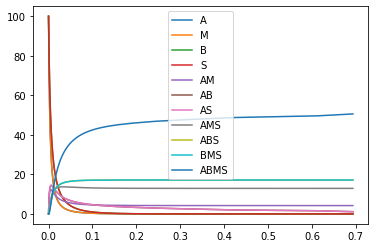

In [20]:
nodes_list = ['A','B','S','M','AB','BMS','ABS','AMS','ABMS','AM','AS']
#nodes_list = ['A','B','ABMS']
optim.plot_observable(0,nodes_list)


**After 750 optimization iterations**


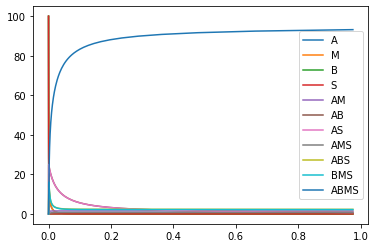

In [21]:
optim.plot_observable(-1,nodes_list)


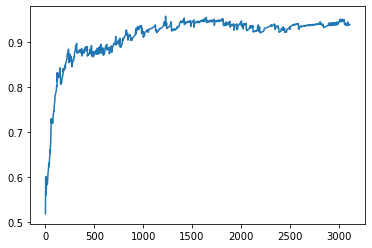

In [22]:
optim.plot_yield()

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

Using CPU


No handles with labels found to put in legend.


Using CPU


No handles with labels found to put in legend.


Using CPU
{'A': 0, 'M': 1, 'B': 2, 'S': 3, 'AM': 4, 'AB': 5, 'AS': 6, 'BM': 7, 'MS': 8, 'ABM': 9, 'AMS': 10, 'ABS': 11, 'BMS': 12, 'ABMS': 13}


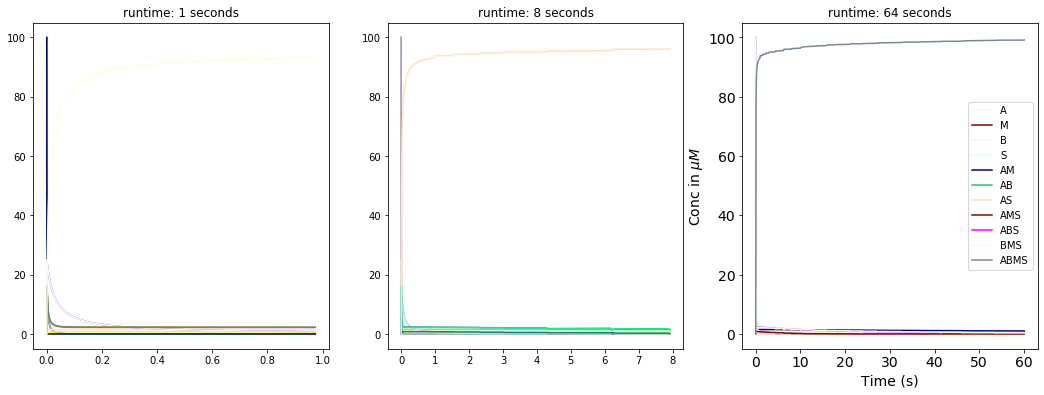

In [23]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(nodes_list,ax=ax[i],)
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
plt.show()

In [24]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

{'A': 0, 'M': 1, 'B': 2, 'S': 3, 'AM': 4, 'AB': 5, 'AS': 6, 'BM': 7, 'MS': 8, 'ABM': 9, 'AMS': 10, 'ABS': 11, 'BMS': 12, 'ABMS': 13}
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|                                                                             |
Reaction:  A + M  ->  AM
Net flux:  tensor([0.6722], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(0.7129, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([0.7067], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 1.0, 'k_off': 0.002061153622438557, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
Reaction:  A + B  ->  AB
Net flux:  tensor([-0.3498], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(29.8312, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([29.5696], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data O

koff:  tensor([0.1719], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 4.248354255291587e-12, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 7}
Reaction:  ABM  ->  BM + A
Net flux:  tensor([3.7468e-05], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(0.1257, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([0.1235], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 4.248354255291587e-12, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 17}
|                                                                             |
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|             

In [25]:
for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
    print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

ABMS  :  tensor([-7026.8038], dtype=torch.float64, grad_fn=<AddBackward0>)
AM  :  tensor([-0.7114], dtype=torch.float64, grad_fn=<AddBackward0>)
MS  :  tensor([139.4527], dtype=torch.float64, grad_fn=<AddBackward0>)
AS  :  tensor([140.1625], dtype=torch.float64, grad_fn=<AddBackward0>)
AB  :  tensor([144.4862], dtype=torch.float64, grad_fn=<AddBackward0>)
BM  :  tensor([144.7425], dtype=torch.float64, grad_fn=<AddBackward0>)
ABM  :  tensor([1382.9394], dtype=torch.float64, grad_fn=<AddBackward0>)
AMS  :  tensor([1384.5069], dtype=torch.float64, grad_fn=<AddBackward0>)
B  :  tensor([1393.4115], dtype=torch.float64, grad_fn=<AddBackward0>)
S  :  tensor([1401.4574], dtype=torch.float64, grad_fn=<AddBackward0>)
ABS  :  tensor([1962.9438], dtype=torch.float64, grad_fn=<AddBackward0>)
M  :  tensor([1977.5932], dtype=torch.float64, grad_fn=<AddBackward0>)
BMS  :  tensor([1998.2806], dtype=torch.float64, grad_fn=<AddBackward0>)
A  :  tensor([2012.4765], dtype=torch.float64, grad_fn=<AddBackwar

In [26]:
print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

None
Matrix([[-0.0006779384], [-0.0006779083], [5.450793e-5], [6.675426e-6], [0.0002592978], [-4.069622e-5], [3.515550e-6], [-4.071726e-5], [3.524071e-6], [0.0004673221], [0.0004267015], [-2.196615e-6], [-2.214166e-6], [99.99956]])
Equilibrium expected yield:  99.9995642089844 %
Parameter containing:
tensor([ 0.7129, 29.8312, 29.8320, 30.3208, 30.3296,  0.1723,  0.1799,  0.1749,
        25.9864, 26.6029, 14.1932,  0.1951, 26.0469, 26.6502, 14.1751,  1.4326,
         1.4371,  0.1257,  0.1259, 20.4077, 20.7729], dtype=torch.float64,
       requires_grad=True)


Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 